In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from  sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,GradientBoostingClassifier,GradientBoostingRegressor,ExtraTreesClassifier,ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [37]:
df=pd.read_csv('C:/Users/Admin/OneDrive/Desktop/EDUCATION/DATA SET_DATATRAINED/database_IND.csv')
df.head(5)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [38]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [39]:
df['country'].value_counts()

IND    907
Name: country, dtype: int64

In [40]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [41]:
df['year_of_capacity_data']

0         NaN
1         NaN
2         NaN
3      2019.0
4      2019.0
        ...  
902    2019.0
903       NaN
904       NaN
905       NaN
906       NaN
Name: year_of_capacity_data, Length: 907, dtype: float64

In [42]:
for i in df:
    un=df[i].unique().size
    a=print(i,un)

country 1
country_long 1
name 907
gppd_idnr 907
capacity_mw 361
latitude 837
longitude 828
primary_fuel 8
other_fuel1 4
other_fuel2 2
other_fuel3 1
commissioning_year 74
owner 281
source 191
url 304
geolocation_source 4
wepp_id 1
year_of_capacity_data 2
generation_gwh_2013 1
generation_gwh_2014 372
generation_gwh_2015 397
generation_gwh_2016 404
generation_gwh_2017 409
generation_gwh_2018 411
generation_gwh_2019 1
generation_data_source 2
estimated_generation_gwh 1


In [43]:
print(df.dtypes)

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object


In [44]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


## Modification of the data set


In [45]:
## column has only NAN value or single type of entry or unique in nature (country,country_long,other_fuel3,wepp_id,generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh,gppd_idnr,'Name,url)
df=df.drop(columns=['country','wepp_id','generation_gwh_2019','estimated_generation_gwh','gppd_idnr','other_fuel3','generation_gwh_2013','name','country_long','url'])


In [46]:
## Year of capacity data is eaither 'NAN' or 2019 which ('indicates the data collected year') this two entryies only so we can remove this column:
df=df.drop(columns=['year_of_capacity_data'])

In [47]:
## Find the column with Null values:
for i in df:
    if df[i].isnull().sum()>0:
        print(i,df[i].isnull().sum())
    else:pass

latitude 46
longitude 46
other_fuel1 709
other_fuel2 906
commissioning_year 380
owner 565
geolocation_source 19
generation_gwh_2014 509
generation_gwh_2015 485
generation_gwh_2016 473
generation_gwh_2017 467
generation_gwh_2018 459
generation_data_source 458


In [48]:
## Other fuel1 & other fuel2 is a object type data, we use mode to replace the null value
df['other_fuel1']=df['other_fuel1'].fillna('Oil')
## Other fuel2 has 906 null value, we can drop it considering the minimum effect of the column as the column has no value
df=df.drop(columns=['other_fuel2'])

In [49]:
## Dealing comission year with mean value:
df['commissioning_year']=df['commissioning_year'].fillna(np.mean(df['commissioning_year']))
## As we donot have any record of owner so we can replace Null value of owner with 'unidentified_owner'
df['owner']=df['owner'].fillna('unidentified_owner')
## As we donot have any record of geolocation source so we can replace Null value of owner with 'unknown'
df['geolocation_source']=df['geolocation_source'].fillna('unknown')
## As we donot have any record of generation_data_source so we can replace Null value of owner with 'unknown'
df['generation_data_source']=df['generation_data_source'].fillna('unknown')
##'generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018' null value of these column can be replace by mean value
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(np.mean(df['generation_gwh_2014']))
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(np.mean(df['generation_gwh_2015']))
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(np.mean(df['generation_gwh_2016']))
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(np.mean(df['generation_gwh_2017']))
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(np.mean(df['generation_gwh_2018']))
##'as we have no latitude longitude record we can use mean method to fill the null value considering the mean and mode is almost same'
df['latitude']=df['latitude'].fillna(np.mean(df['latitude']))
df['longitude']=df['longitude'].fillna(np.mean(df['longitude']))


<AxesSubplot:>

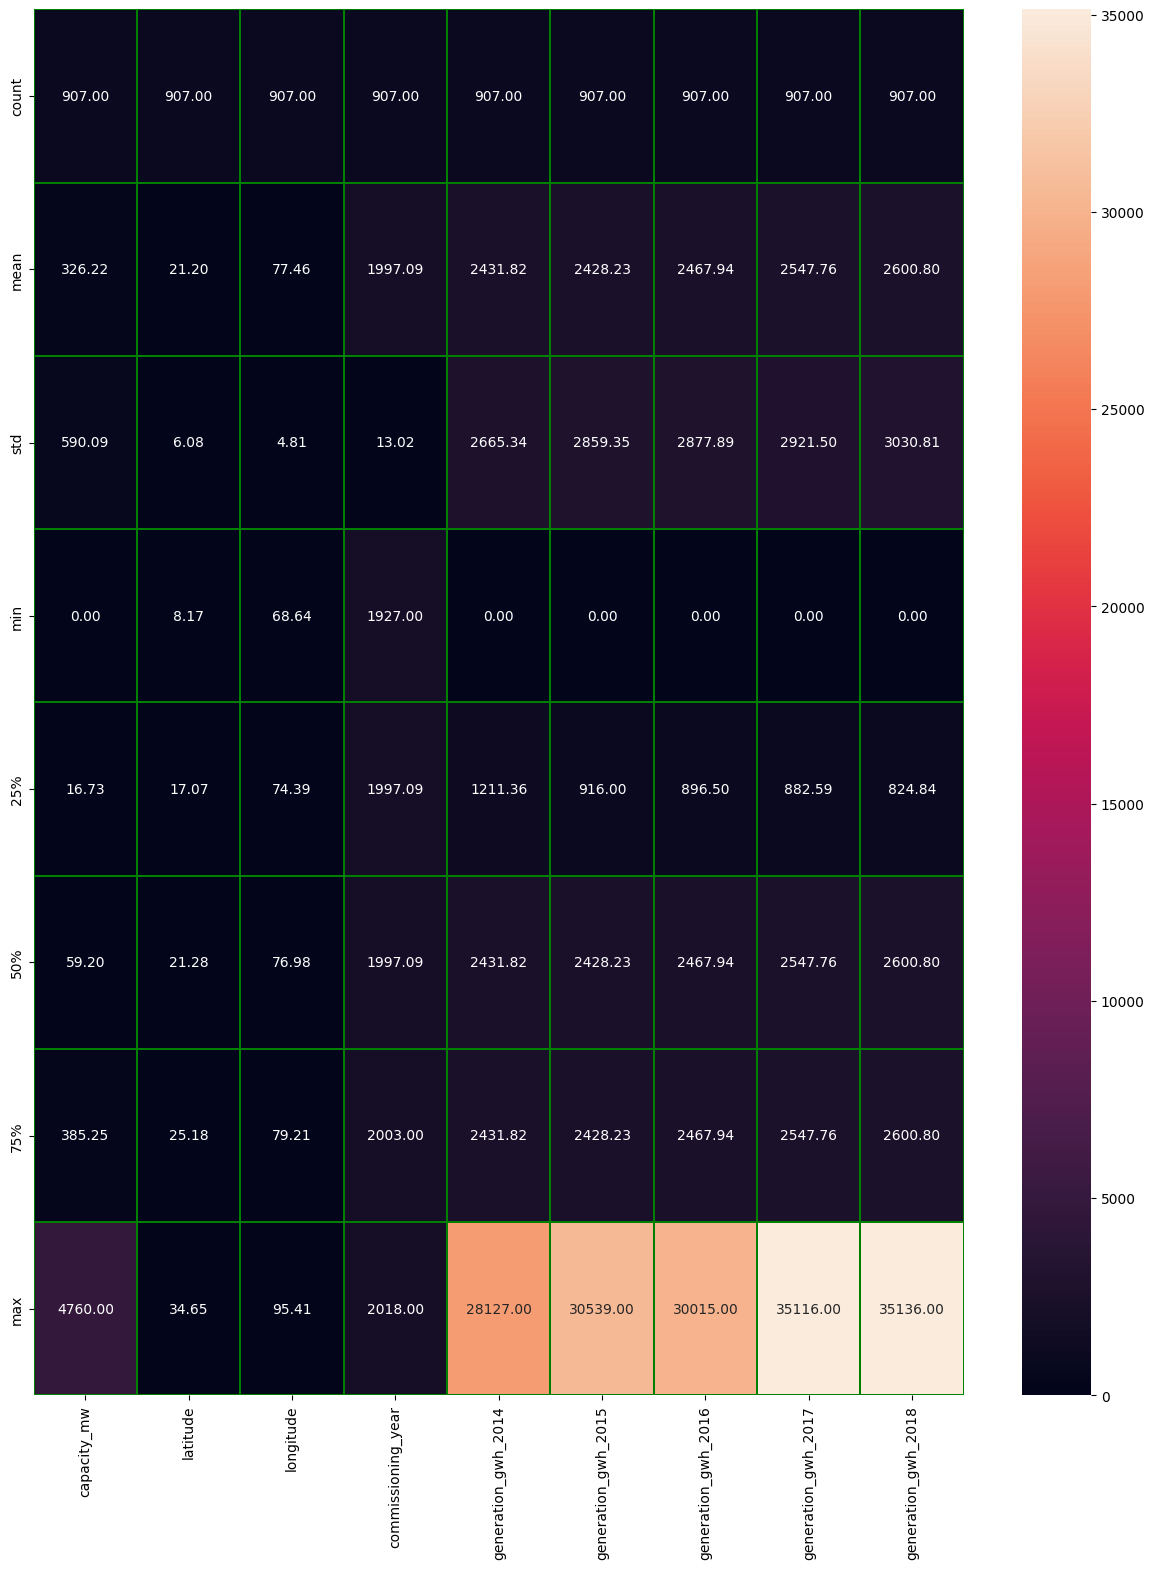

In [50]:
df.describe()
plt.figure(figsize=(15,18))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linecolor='green',linewidths=0.1)

In [51]:
df.dtypes

capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel               object
other_fuel1                object
commissioning_year        float64
owner                      object
source                     object
geolocation_source         object
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_gwh_2018       float64
generation_data_source     object
dtype: object

In [52]:
df['commissioning_year']=df['commissioning_year'].astype(int)

## Analysing Categorical data in relationship with numaric data

<AxesSubplot:>

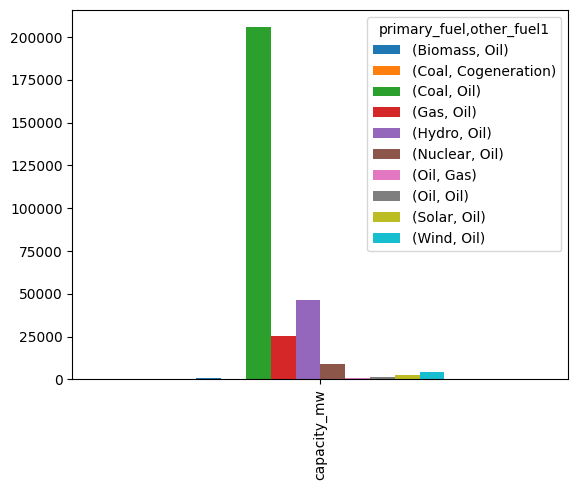

In [53]:
pivot1=pd.pivot_table(data=df,values=['capacity_mw'],columns=['primary_fuel','other_fuel1'],aggfunc=sum)
pivot1.plot.bar()

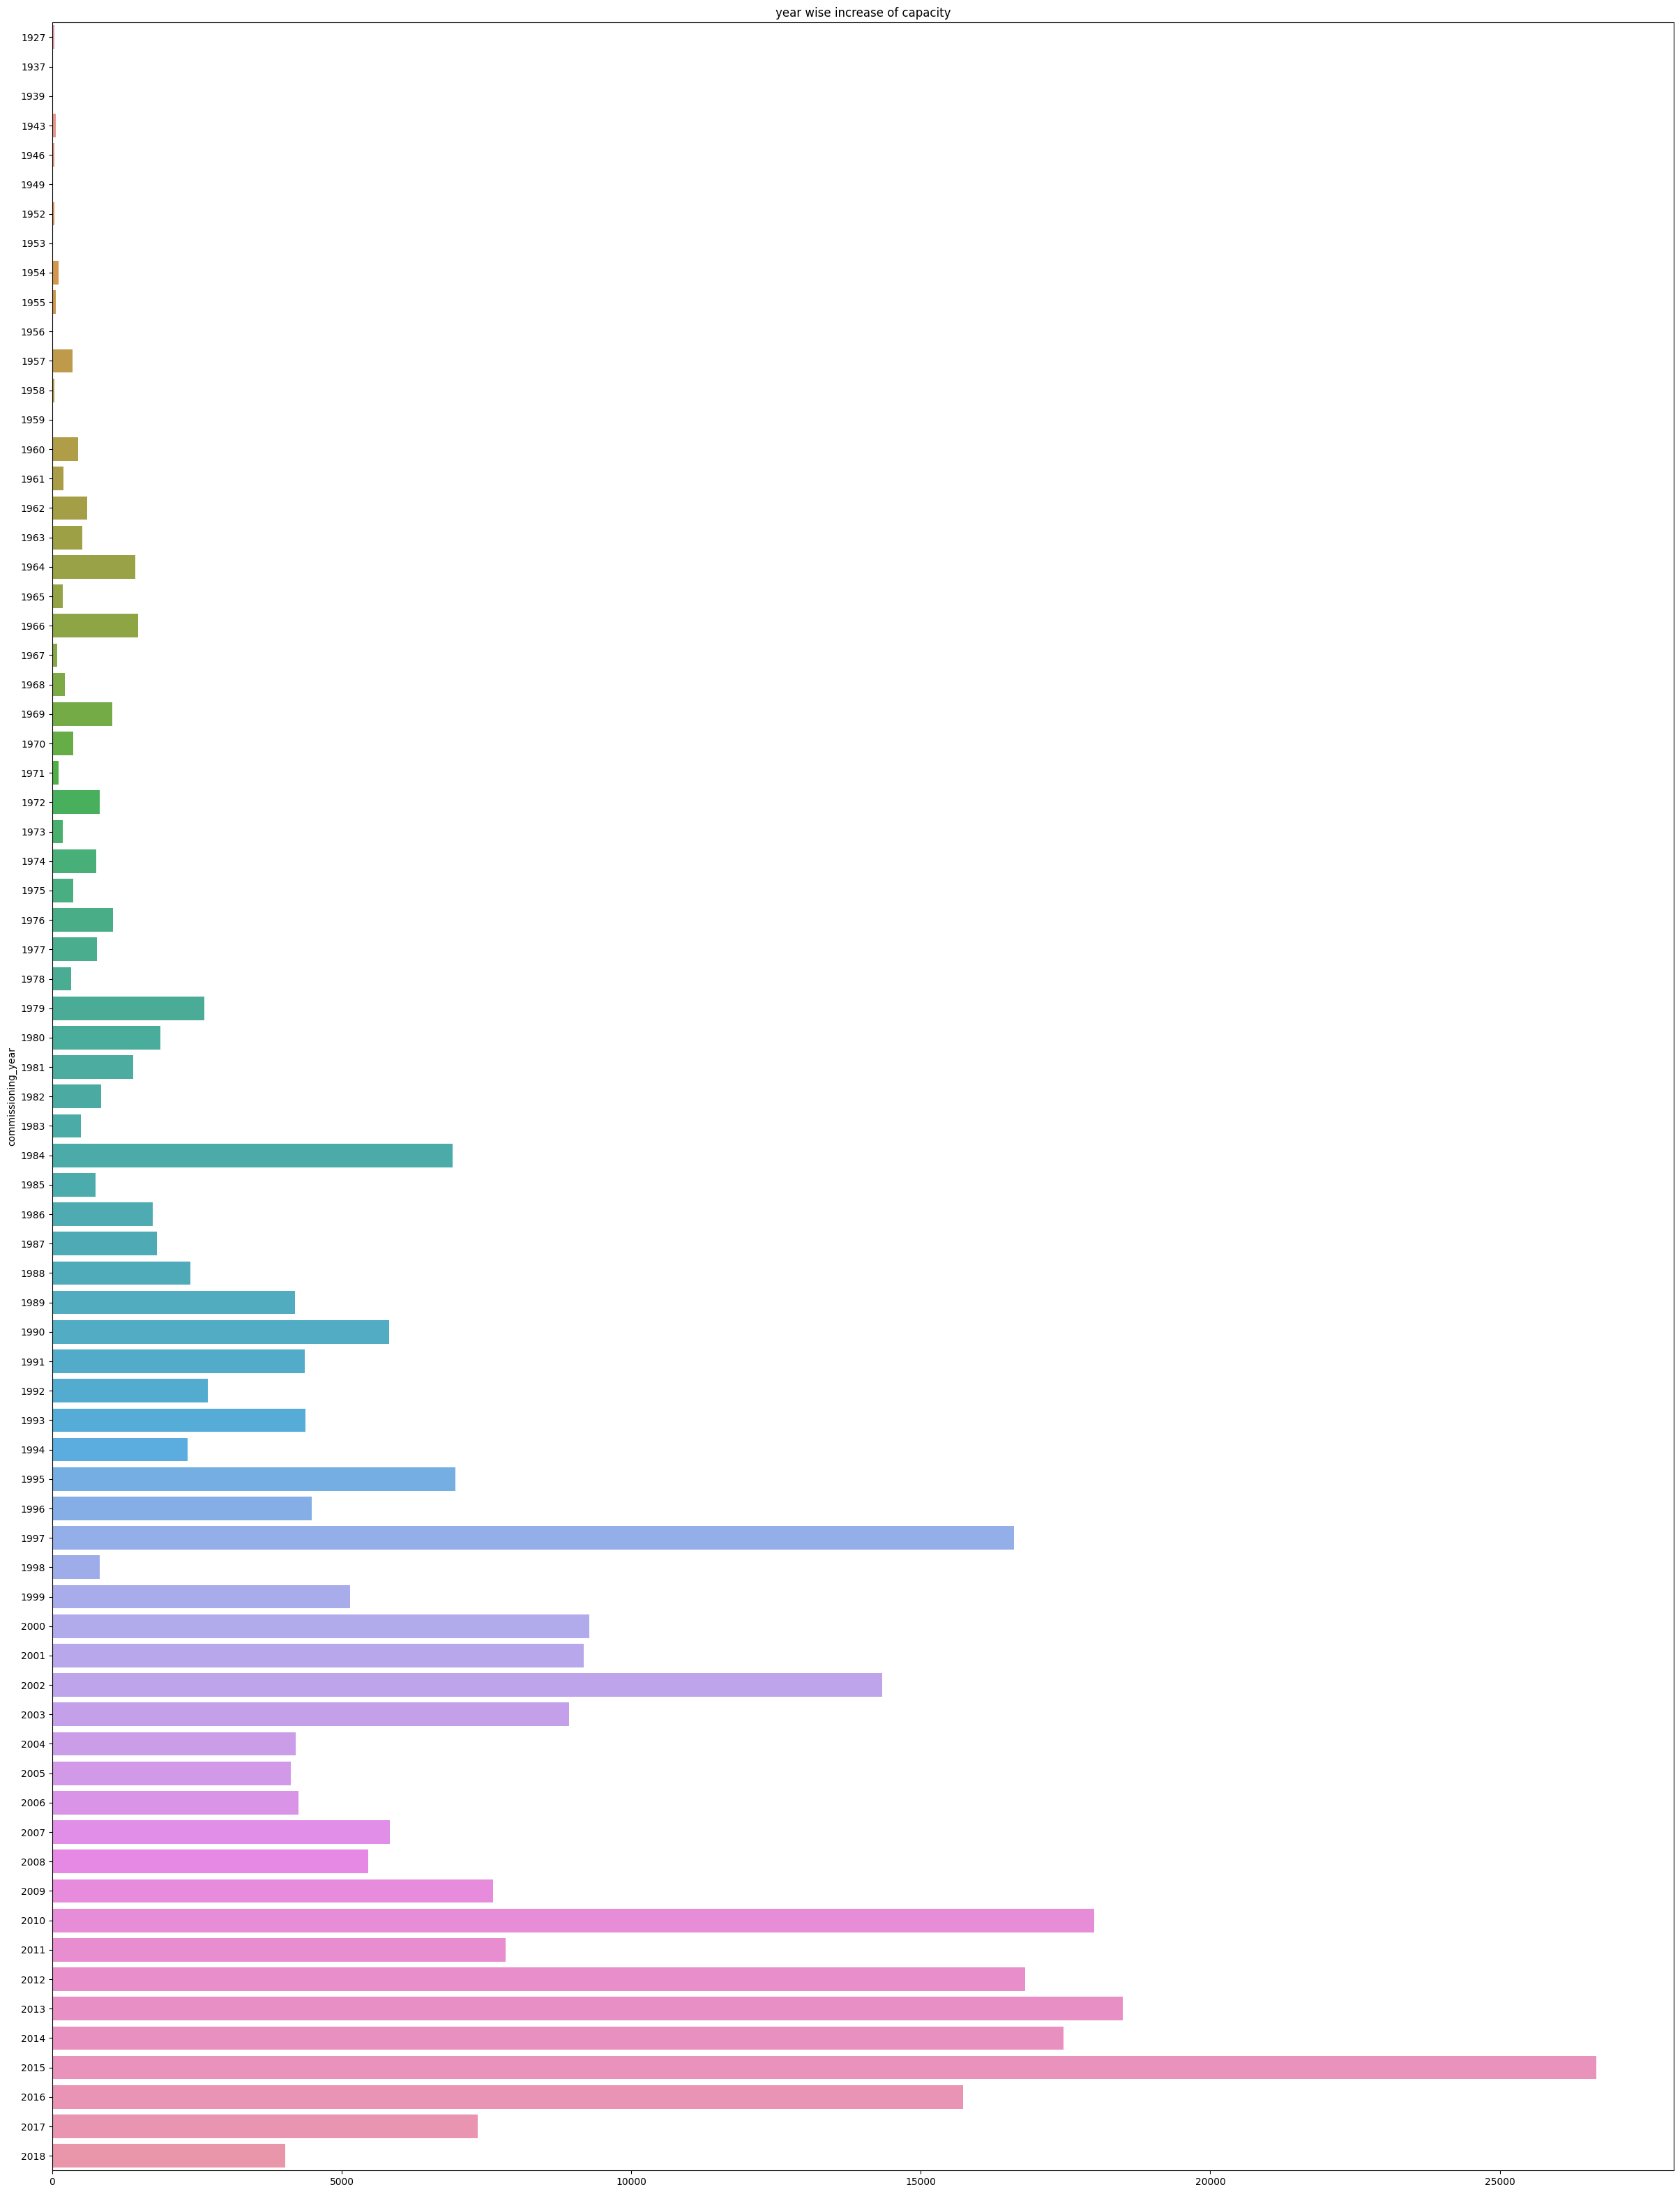

In [54]:
pivot2=pd.pivot_table(data=df,values=['capacity_mw'],columns=['commissioning_year'],aggfunc=sum)
plt.figure(figsize=(30,40))
sns.barplot(pivot2,orient='h')
plt.title('year wise increase of capacity')
plt.show()

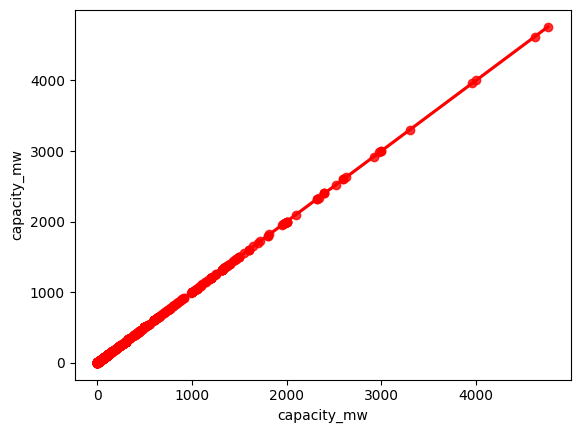

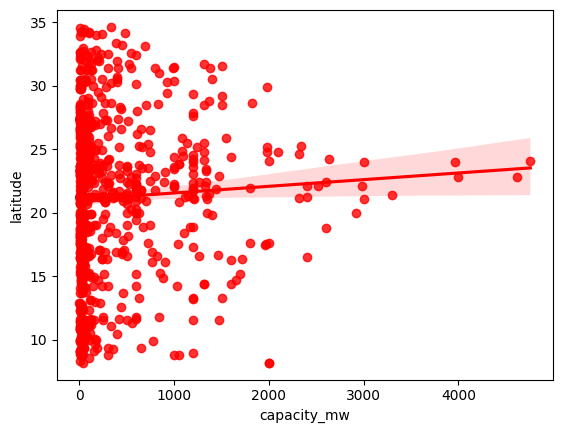

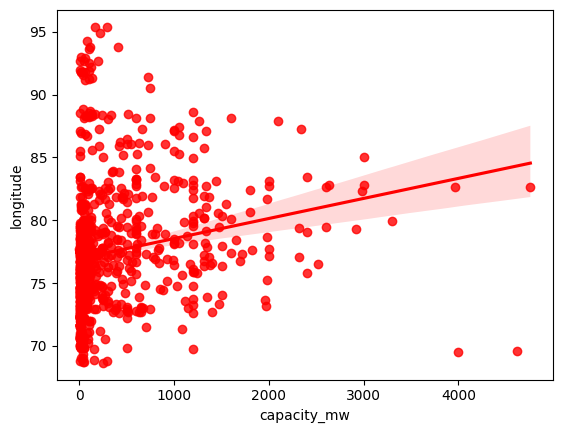

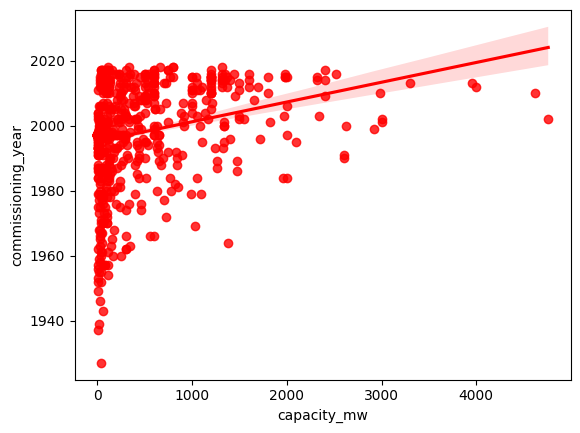

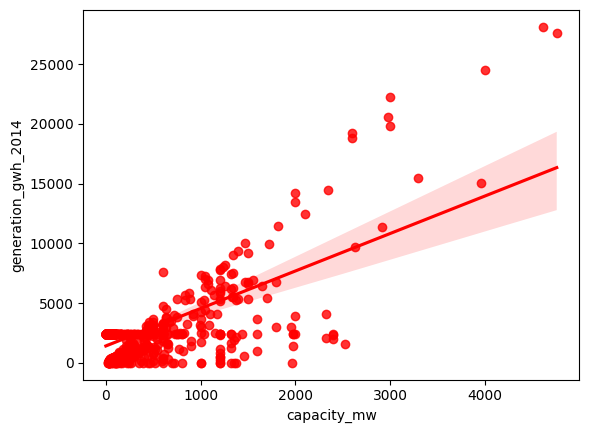

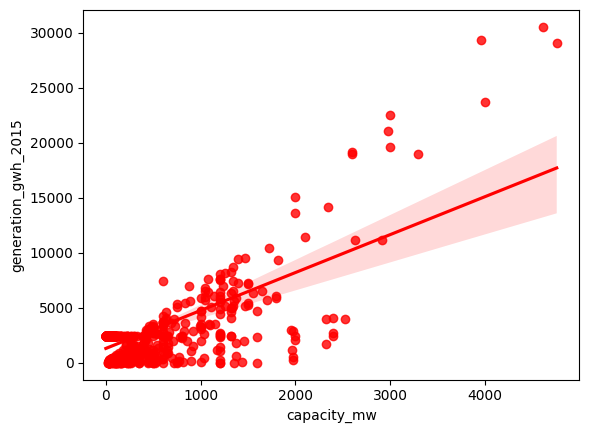

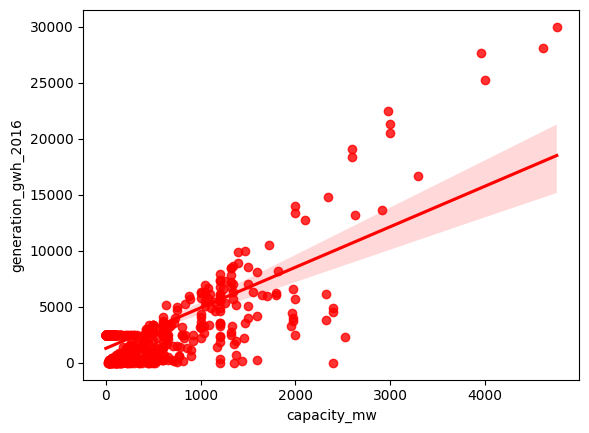

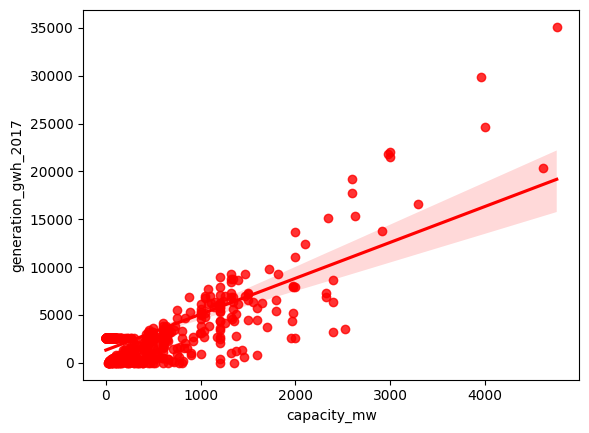

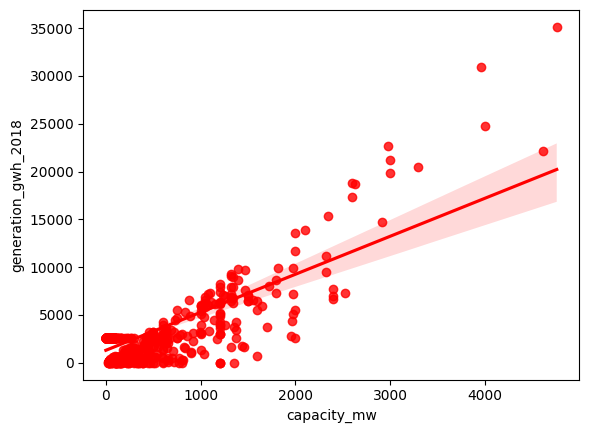

In [55]:
for column in df.columns:
    if df[column].dtype=='int32' or df[column].dtype=='float64':
        sns.regplot(data=df,x='capacity_mw',y=column,color='red')
        plt.show() 
    else:pass

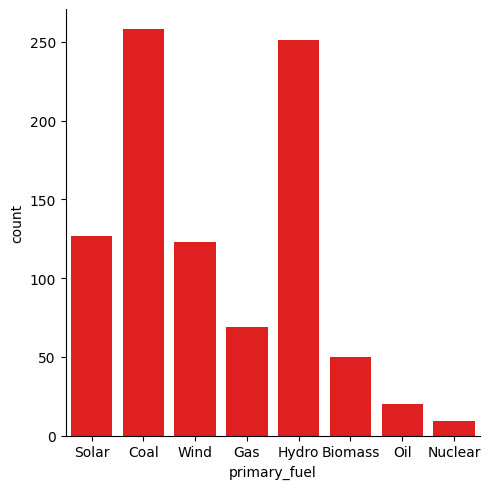

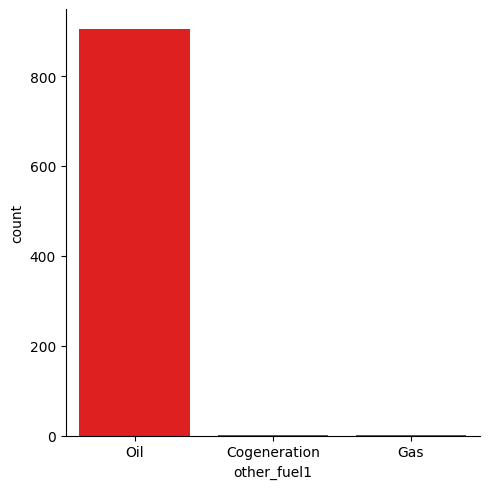

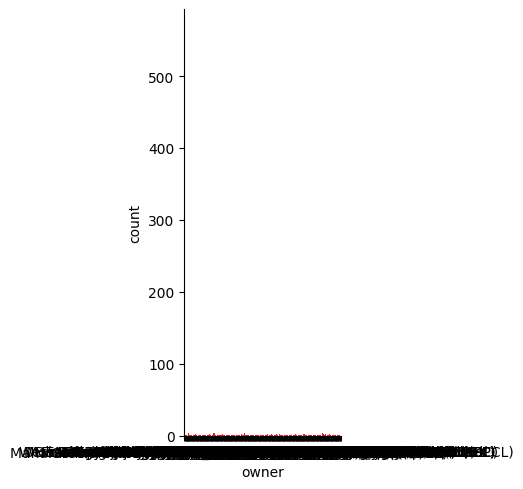

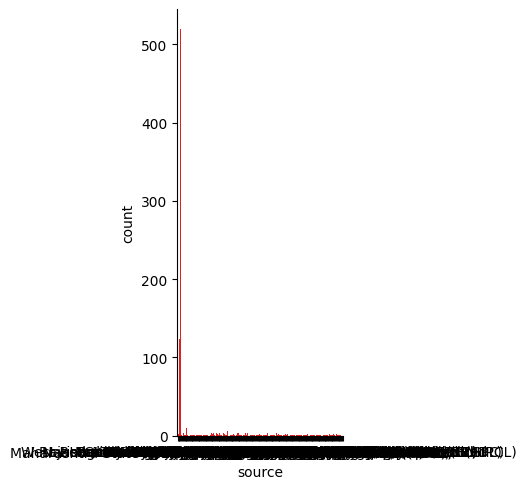

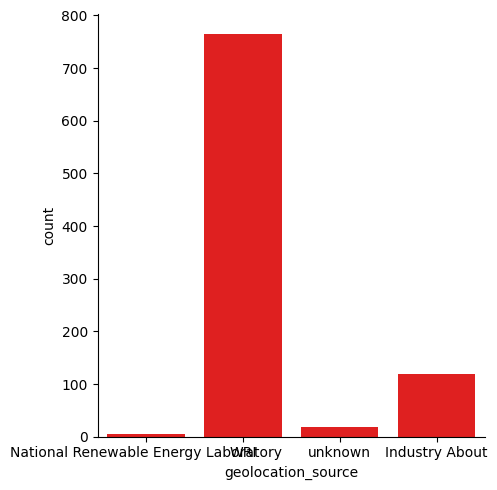

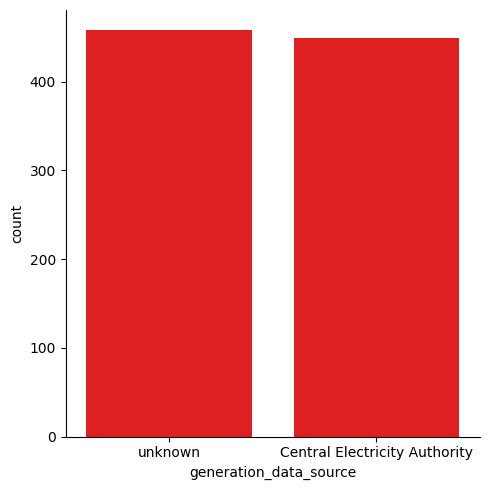

In [56]:
for column in df.columns:
    if df[column].dtype==object:
        sns.catplot(data=df,x=column,kind='count',color='red')
        plt.show() 
    else:pass

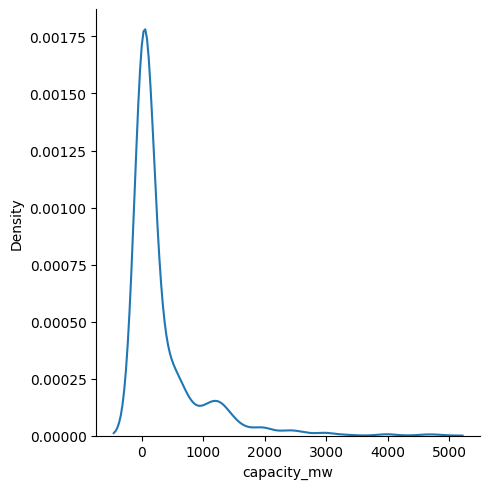

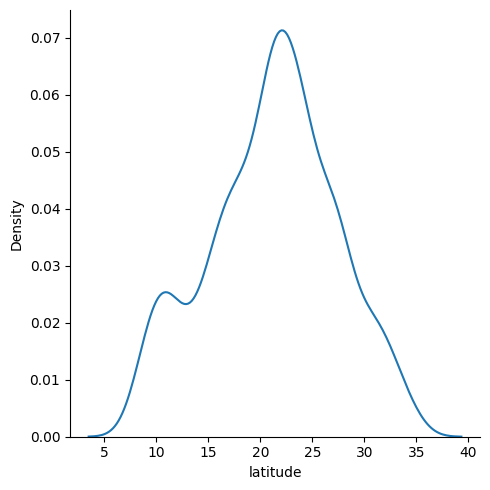

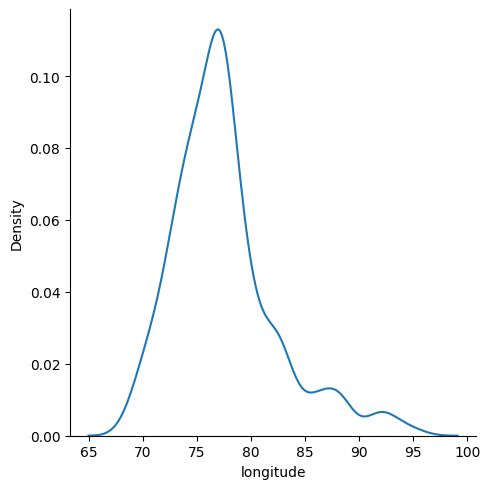

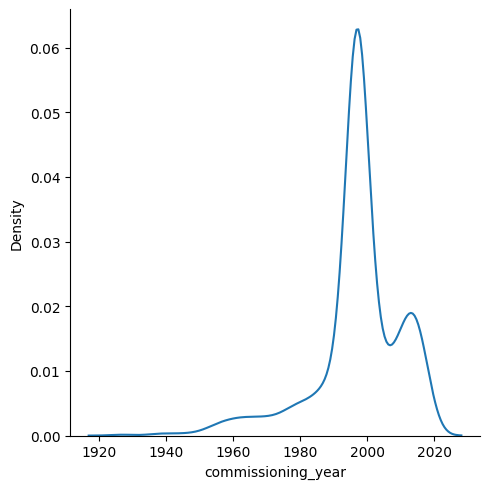

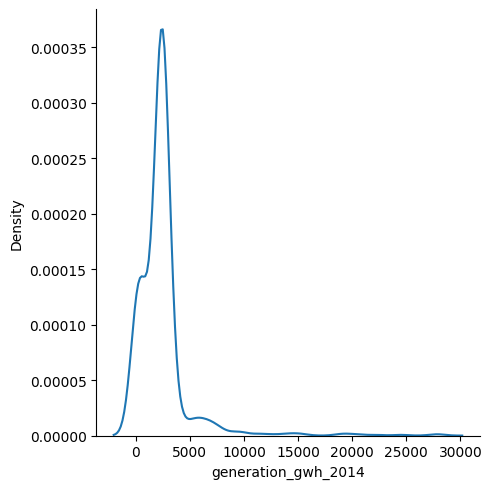

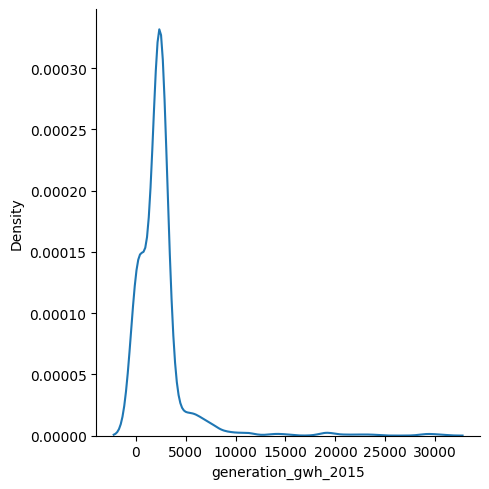

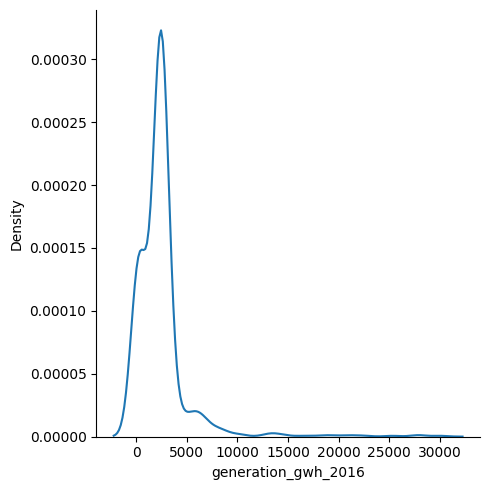

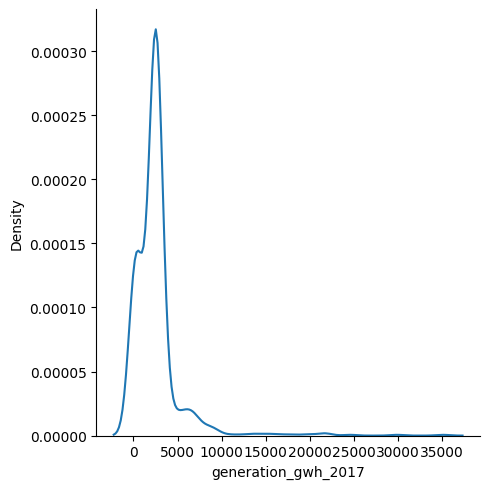

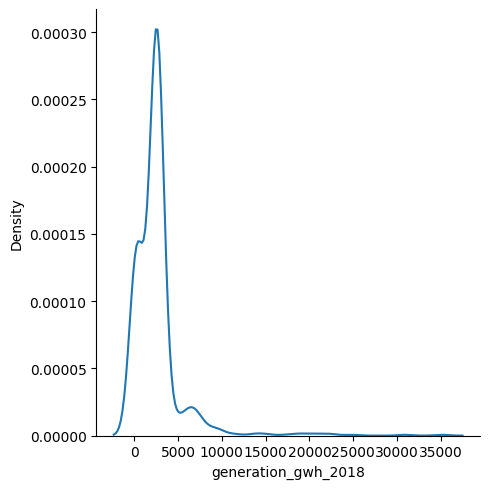

In [57]:
for column in df.columns:
    if df[column].dtype=='int32' or df[column].dtype=='float64':
        sns.displot(data=df,x=column,kind='kde')
        plt.show() 
    else:pass 

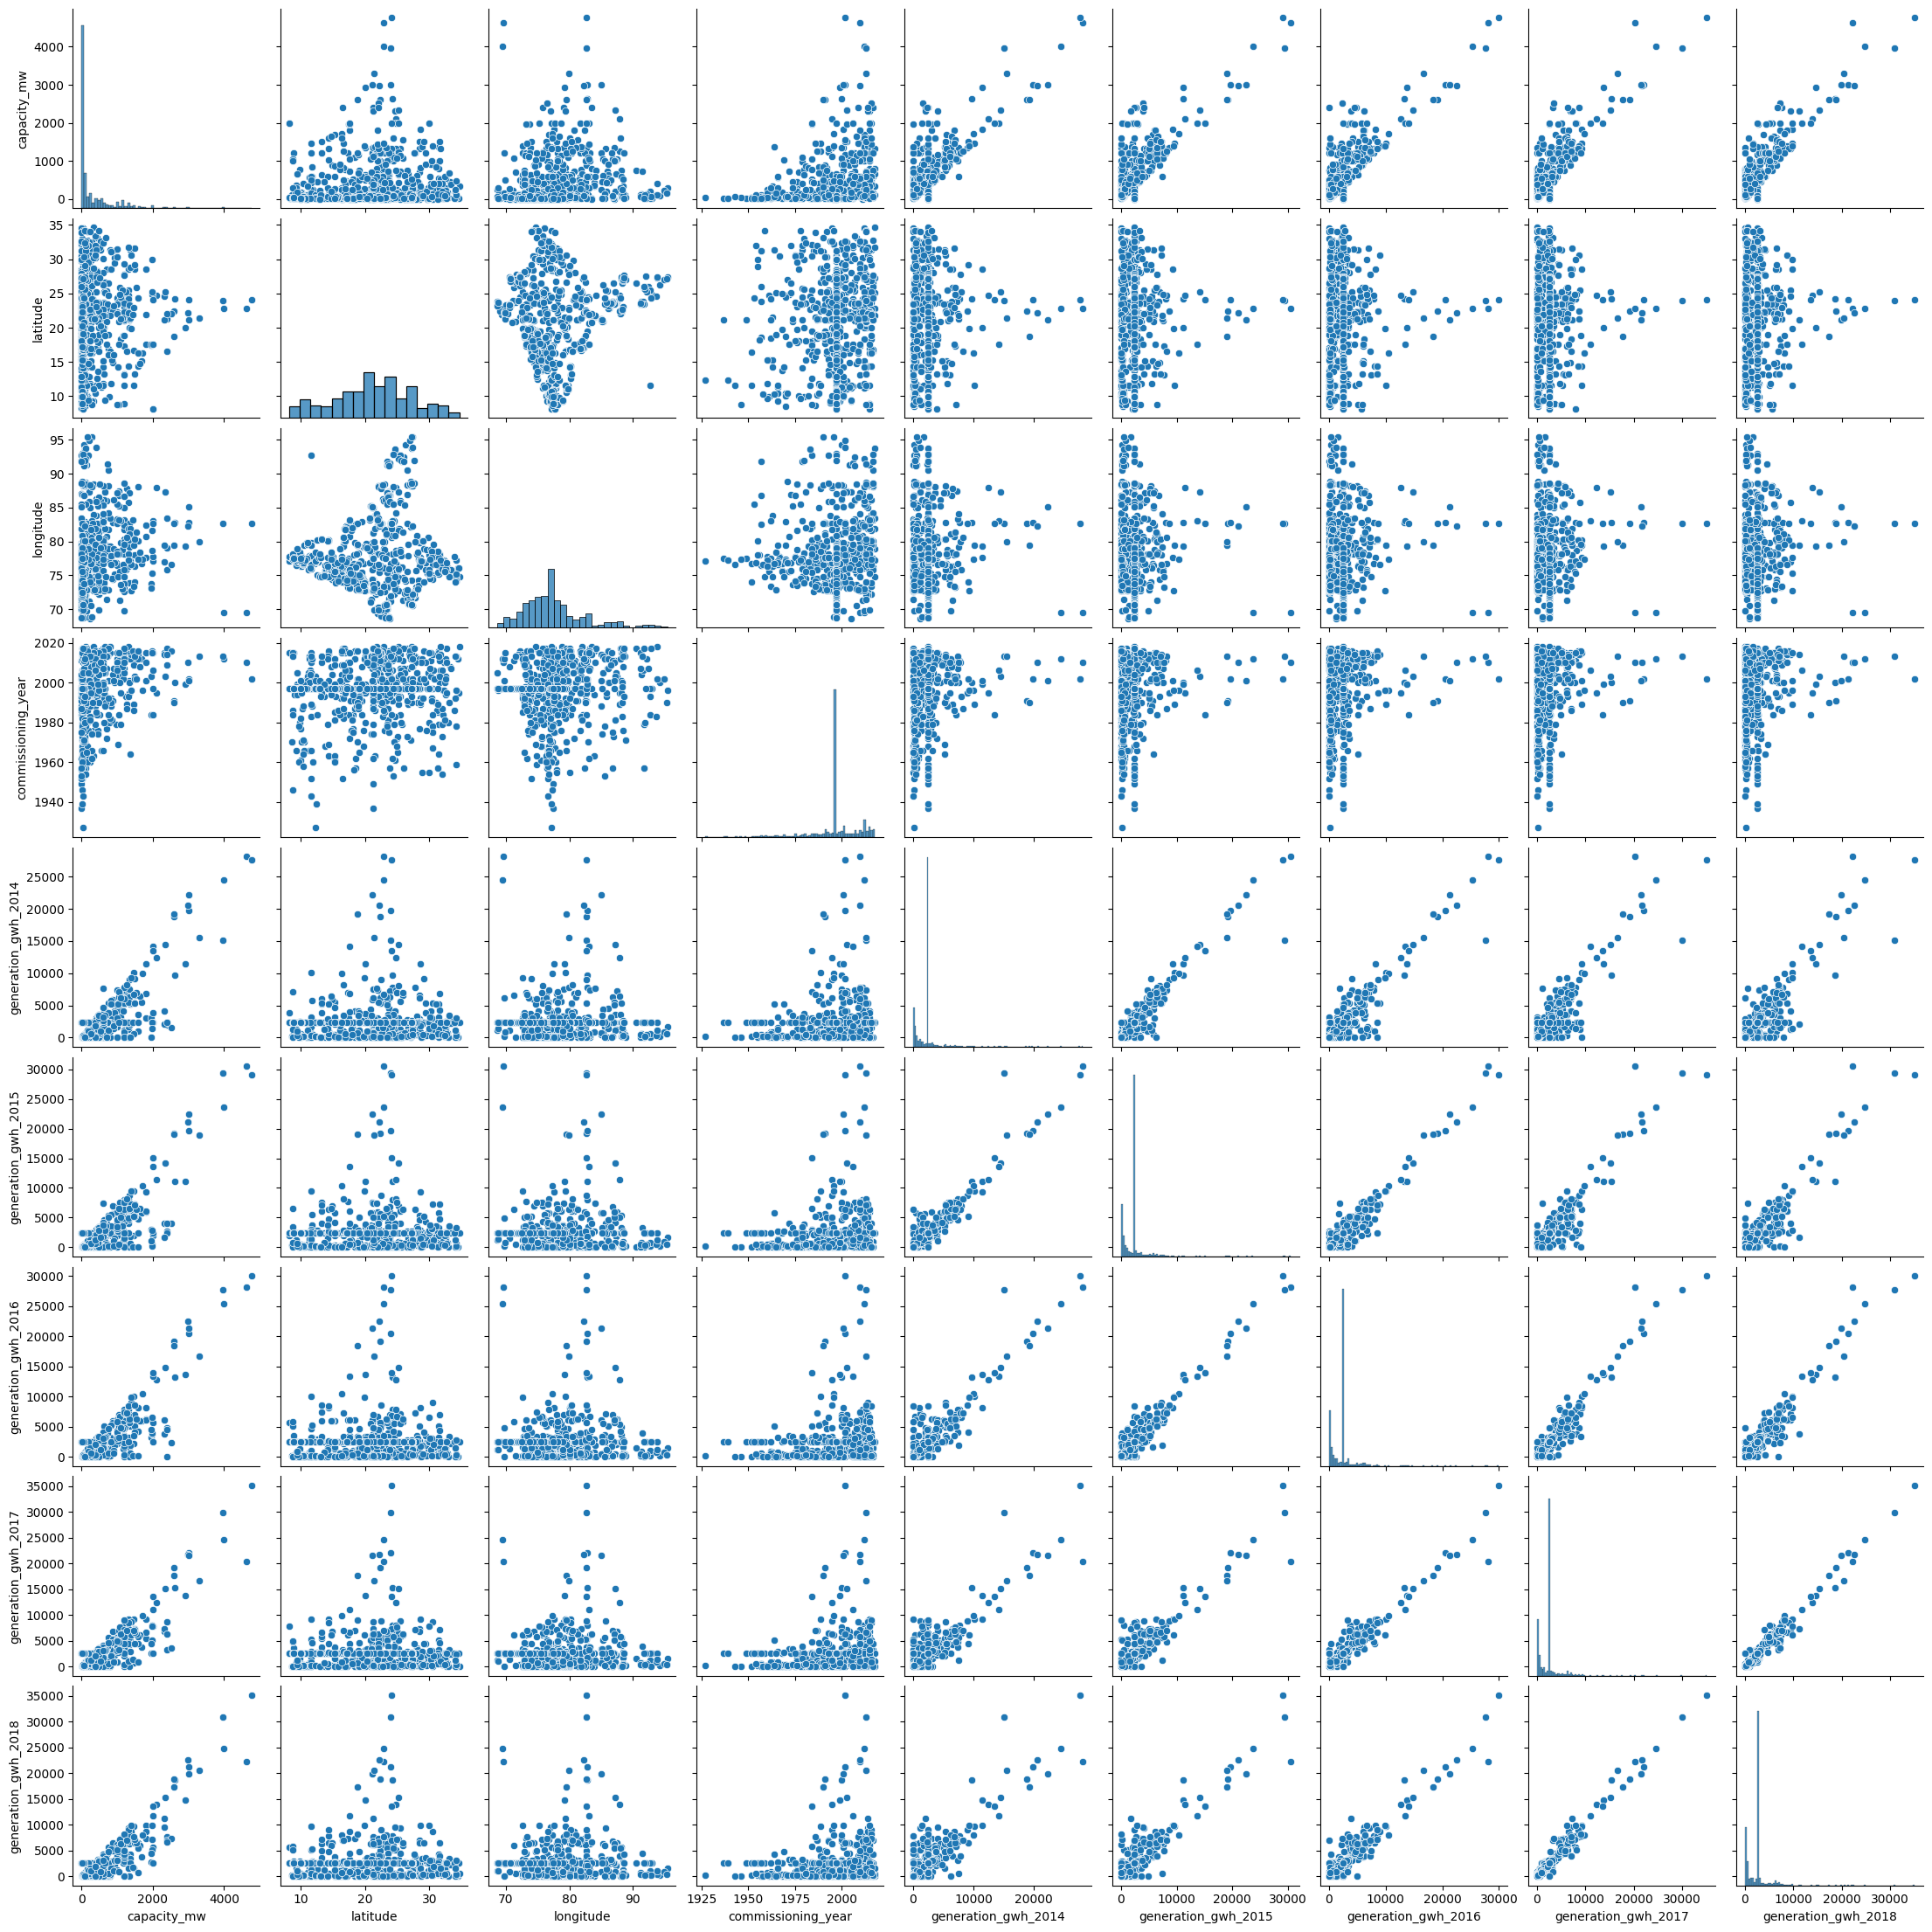

In [58]:
sns.pairplot(df)

In [59]:
oe=OrdinalEncoder()
for column in df:
    if df[column].dtype==object:
        oe=OrdinalEncoder()
        df[column]=oe.fit_transform(df[column].values.reshape(-1,1))
    else:pass 
print(df)

     capacity_mw  latitude  longitude  primary_fuel  other_fuel1  \
0            2.5   28.1839    73.2407           6.0          2.0   
1           98.0   24.7663    74.6090           1.0          2.0   
2           39.2   21.9038    69.3732           7.0          2.0   
3          135.0   23.8712    91.3602           2.0          2.0   
4         1800.0   21.9603    82.4091           1.0          2.0   
..           ...       ...        ...           ...          ...   
902       1600.0   16.2949    77.3568           1.0          2.0   
903          3.0   12.8932    78.1654           6.0          2.0   
904         25.5   15.2758    75.5811           7.0          2.0   
905         80.0   24.3500    73.7477           1.0          2.0   
906         16.5    9.9344    77.4768           7.0          2.0   

     commissioning_year  owner  source  geolocation_source  \
0                  2011  229.0   109.0                 1.0   
1                  1997  258.0   174.0                 2.0 

In [60]:
## Analysis the skew ness and modification
for i in df:
    x=df[i].skew()
    if x>=5:
        df[i]=np.cbrt(df[i])
    else:pass
print('modified skewness of "data" is:')
print('=======================================')
print(df.skew())

modified skewness of "data" is:
capacity_mw                3.123576
latitude                  -0.149698
longitude                  1.141881
primary_fuel               0.472251
other_fuel1              -20.453120
commissioning_year        -1.390520
owner                     -1.373940
source                     1.827373
geolocation_source        -1.920302
generation_gwh_2014       -0.371187
generation_gwh_2015       -0.269579
generation_gwh_2016       -0.279323
generation_gwh_2017       -0.331857
generation_gwh_2018        4.937907
generation_data_source    -0.019880
dtype: float64


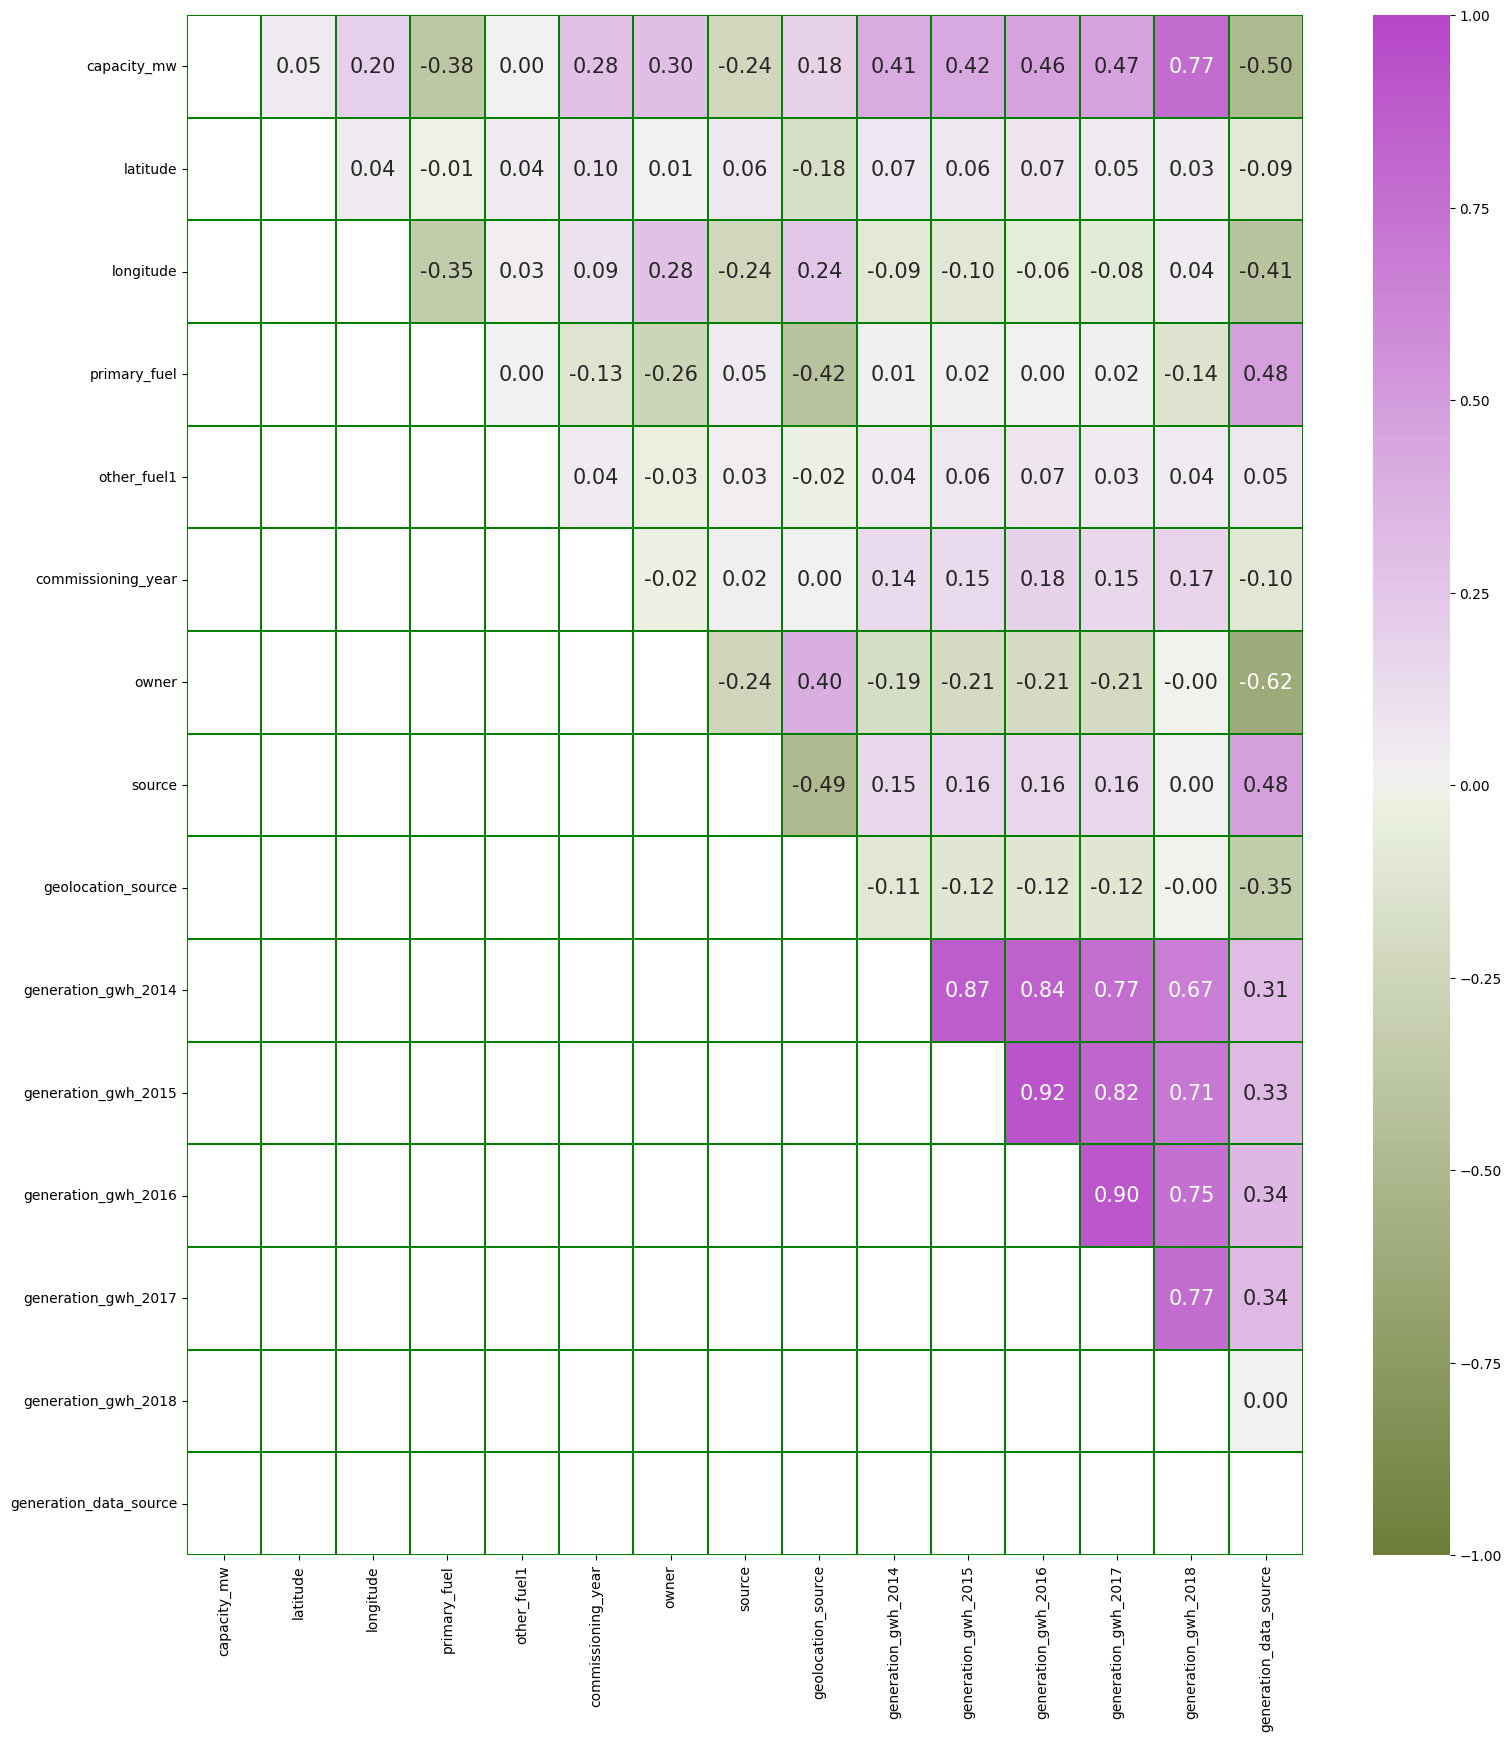

In [61]:
v=df.corr()
plt.figure(figsize=(18,20))
mask=np.zeros_like(v)
mask[np.tril_indices_from(mask)]=True
sns.heatmap(v,vmax=1,vmin=-1,annot=True,annot_kws={'fontsize':15},fmt='0.2f',linewidths=0.2,linecolor='green',mask=mask,cmap=sns.diverging_palette(100,300,as_cmap=True))
plt.show()

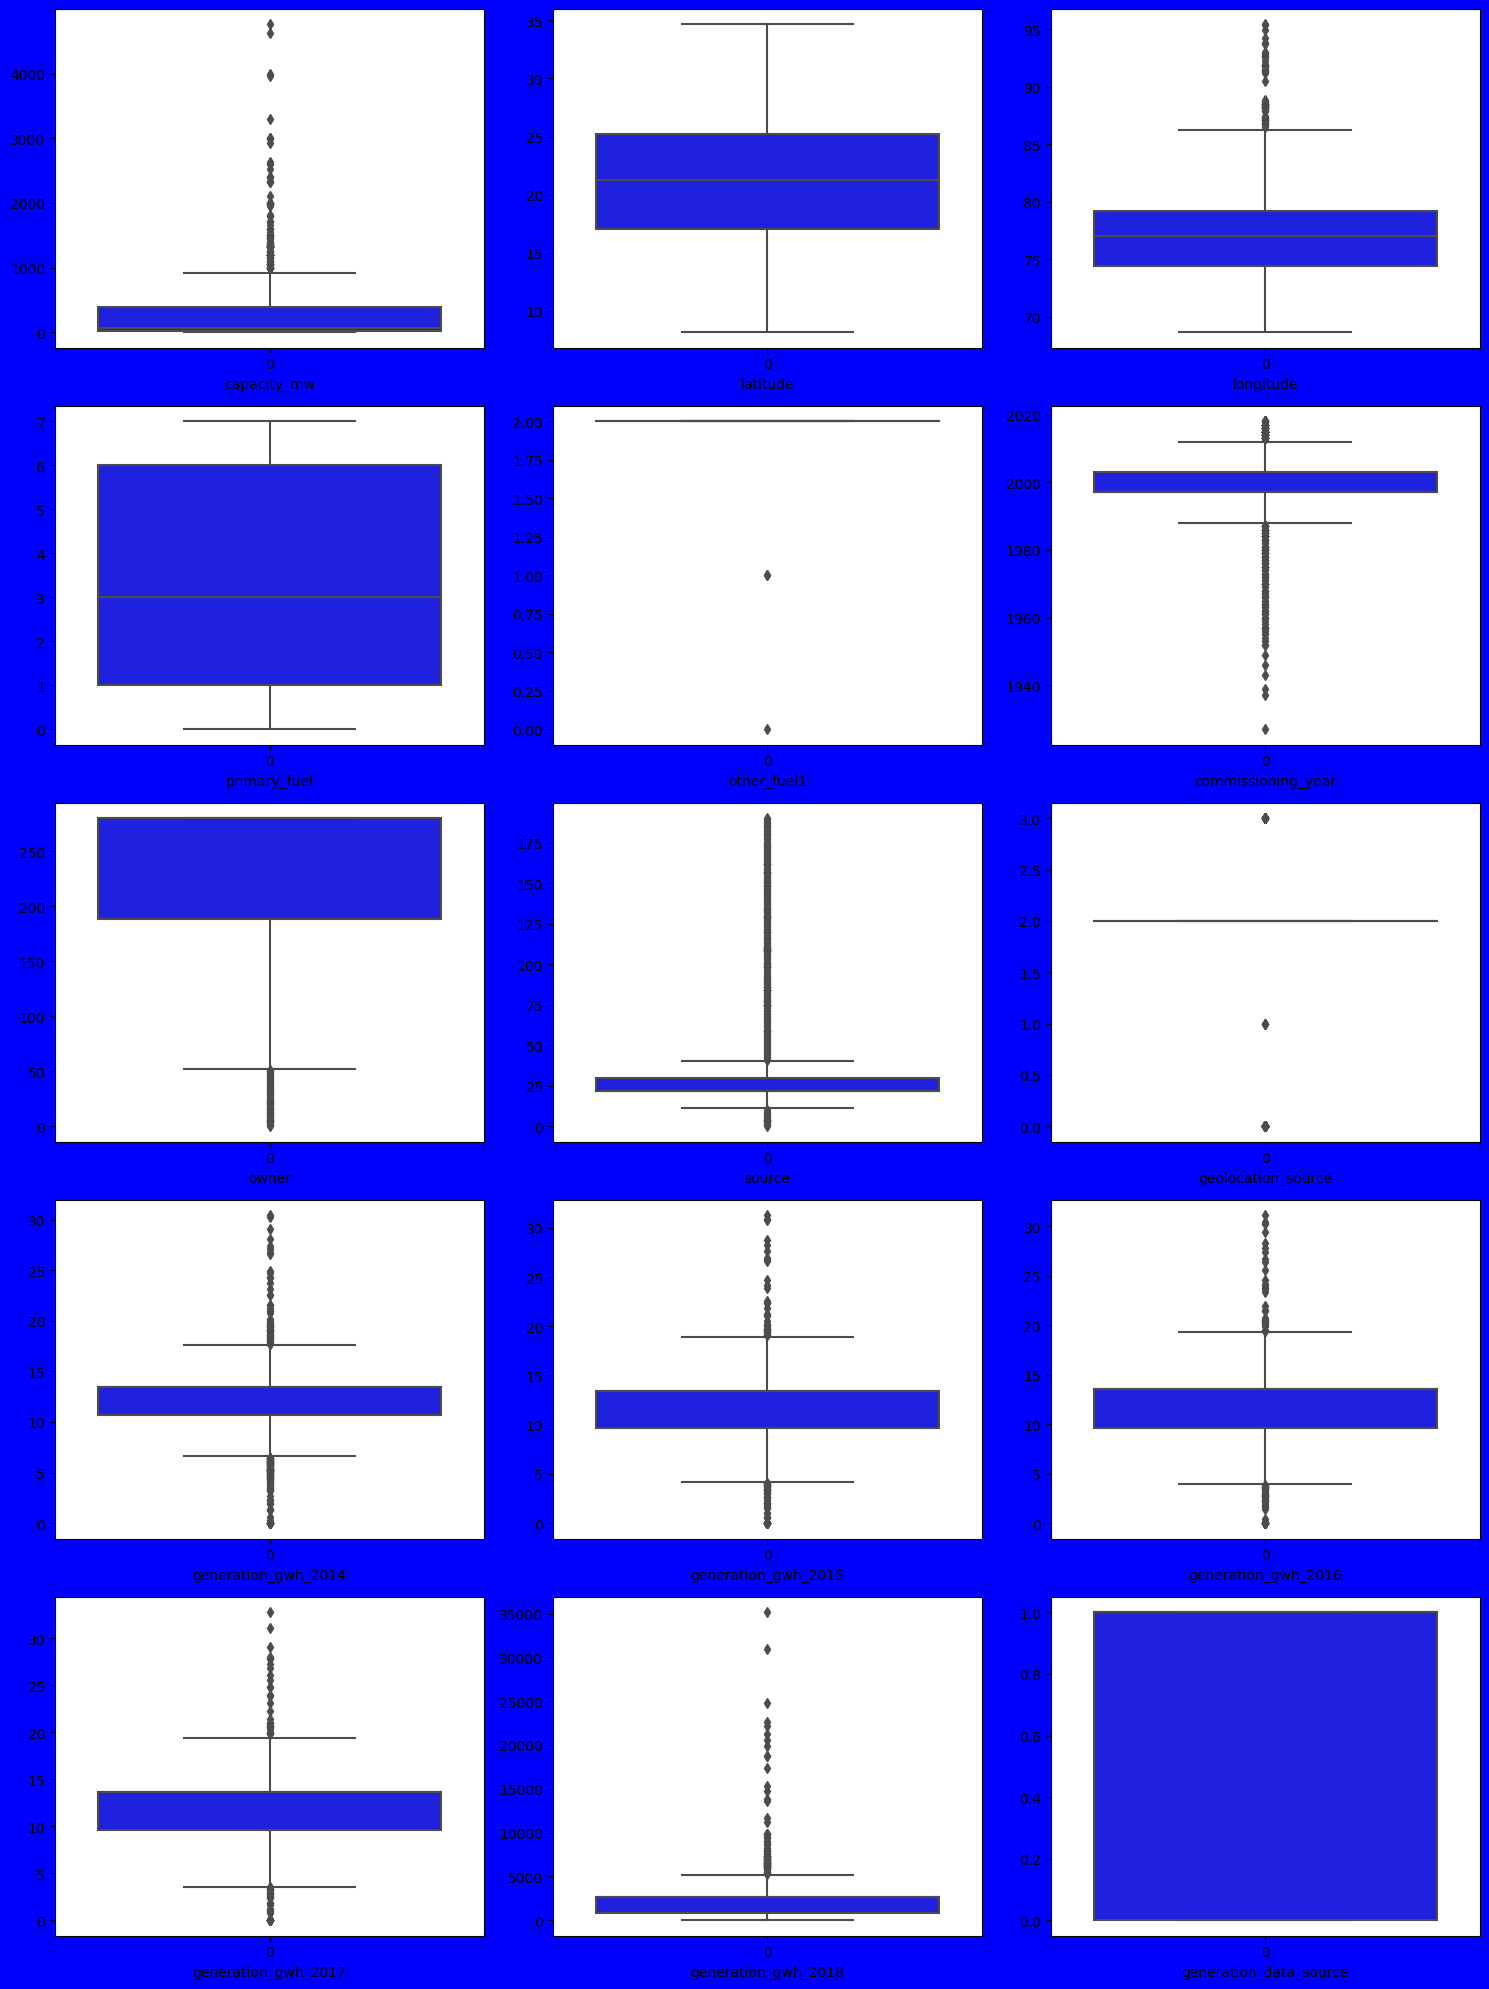

In [63]:
plt.figure(figsize=(15,20),facecolor='blue')
plotnumber=1
for column in df:
    plt.subplot(5,3,plotnumber)
    sns.boxplot(df[column],color='blue')
    plt.xlabel(column)
    plotnumber+=1
plt.tight_layout() 

In [64]:
from scipy.stats import zscore
columns=df.columns
out_lier=df[columns]
z=np.abs(zscore(out_lier))
## Removing outlier
df_z=df[(z<3).all(axis=1)]
print('## dataloss:')
print((df.shape[0]-df_z.shape[0])/(df.shape[0])*100)

## dataloss:
8.26901874310915


## CLASSIFICATION ANALYSIS WITH 'PRIMARY FUEL'
## as it is a multi class classification we are not going to use logistic regression

In [65]:
## Feature and label selection
x=df_z.drop(columns='primary_fuel')
y=df_z['primary_fuel']

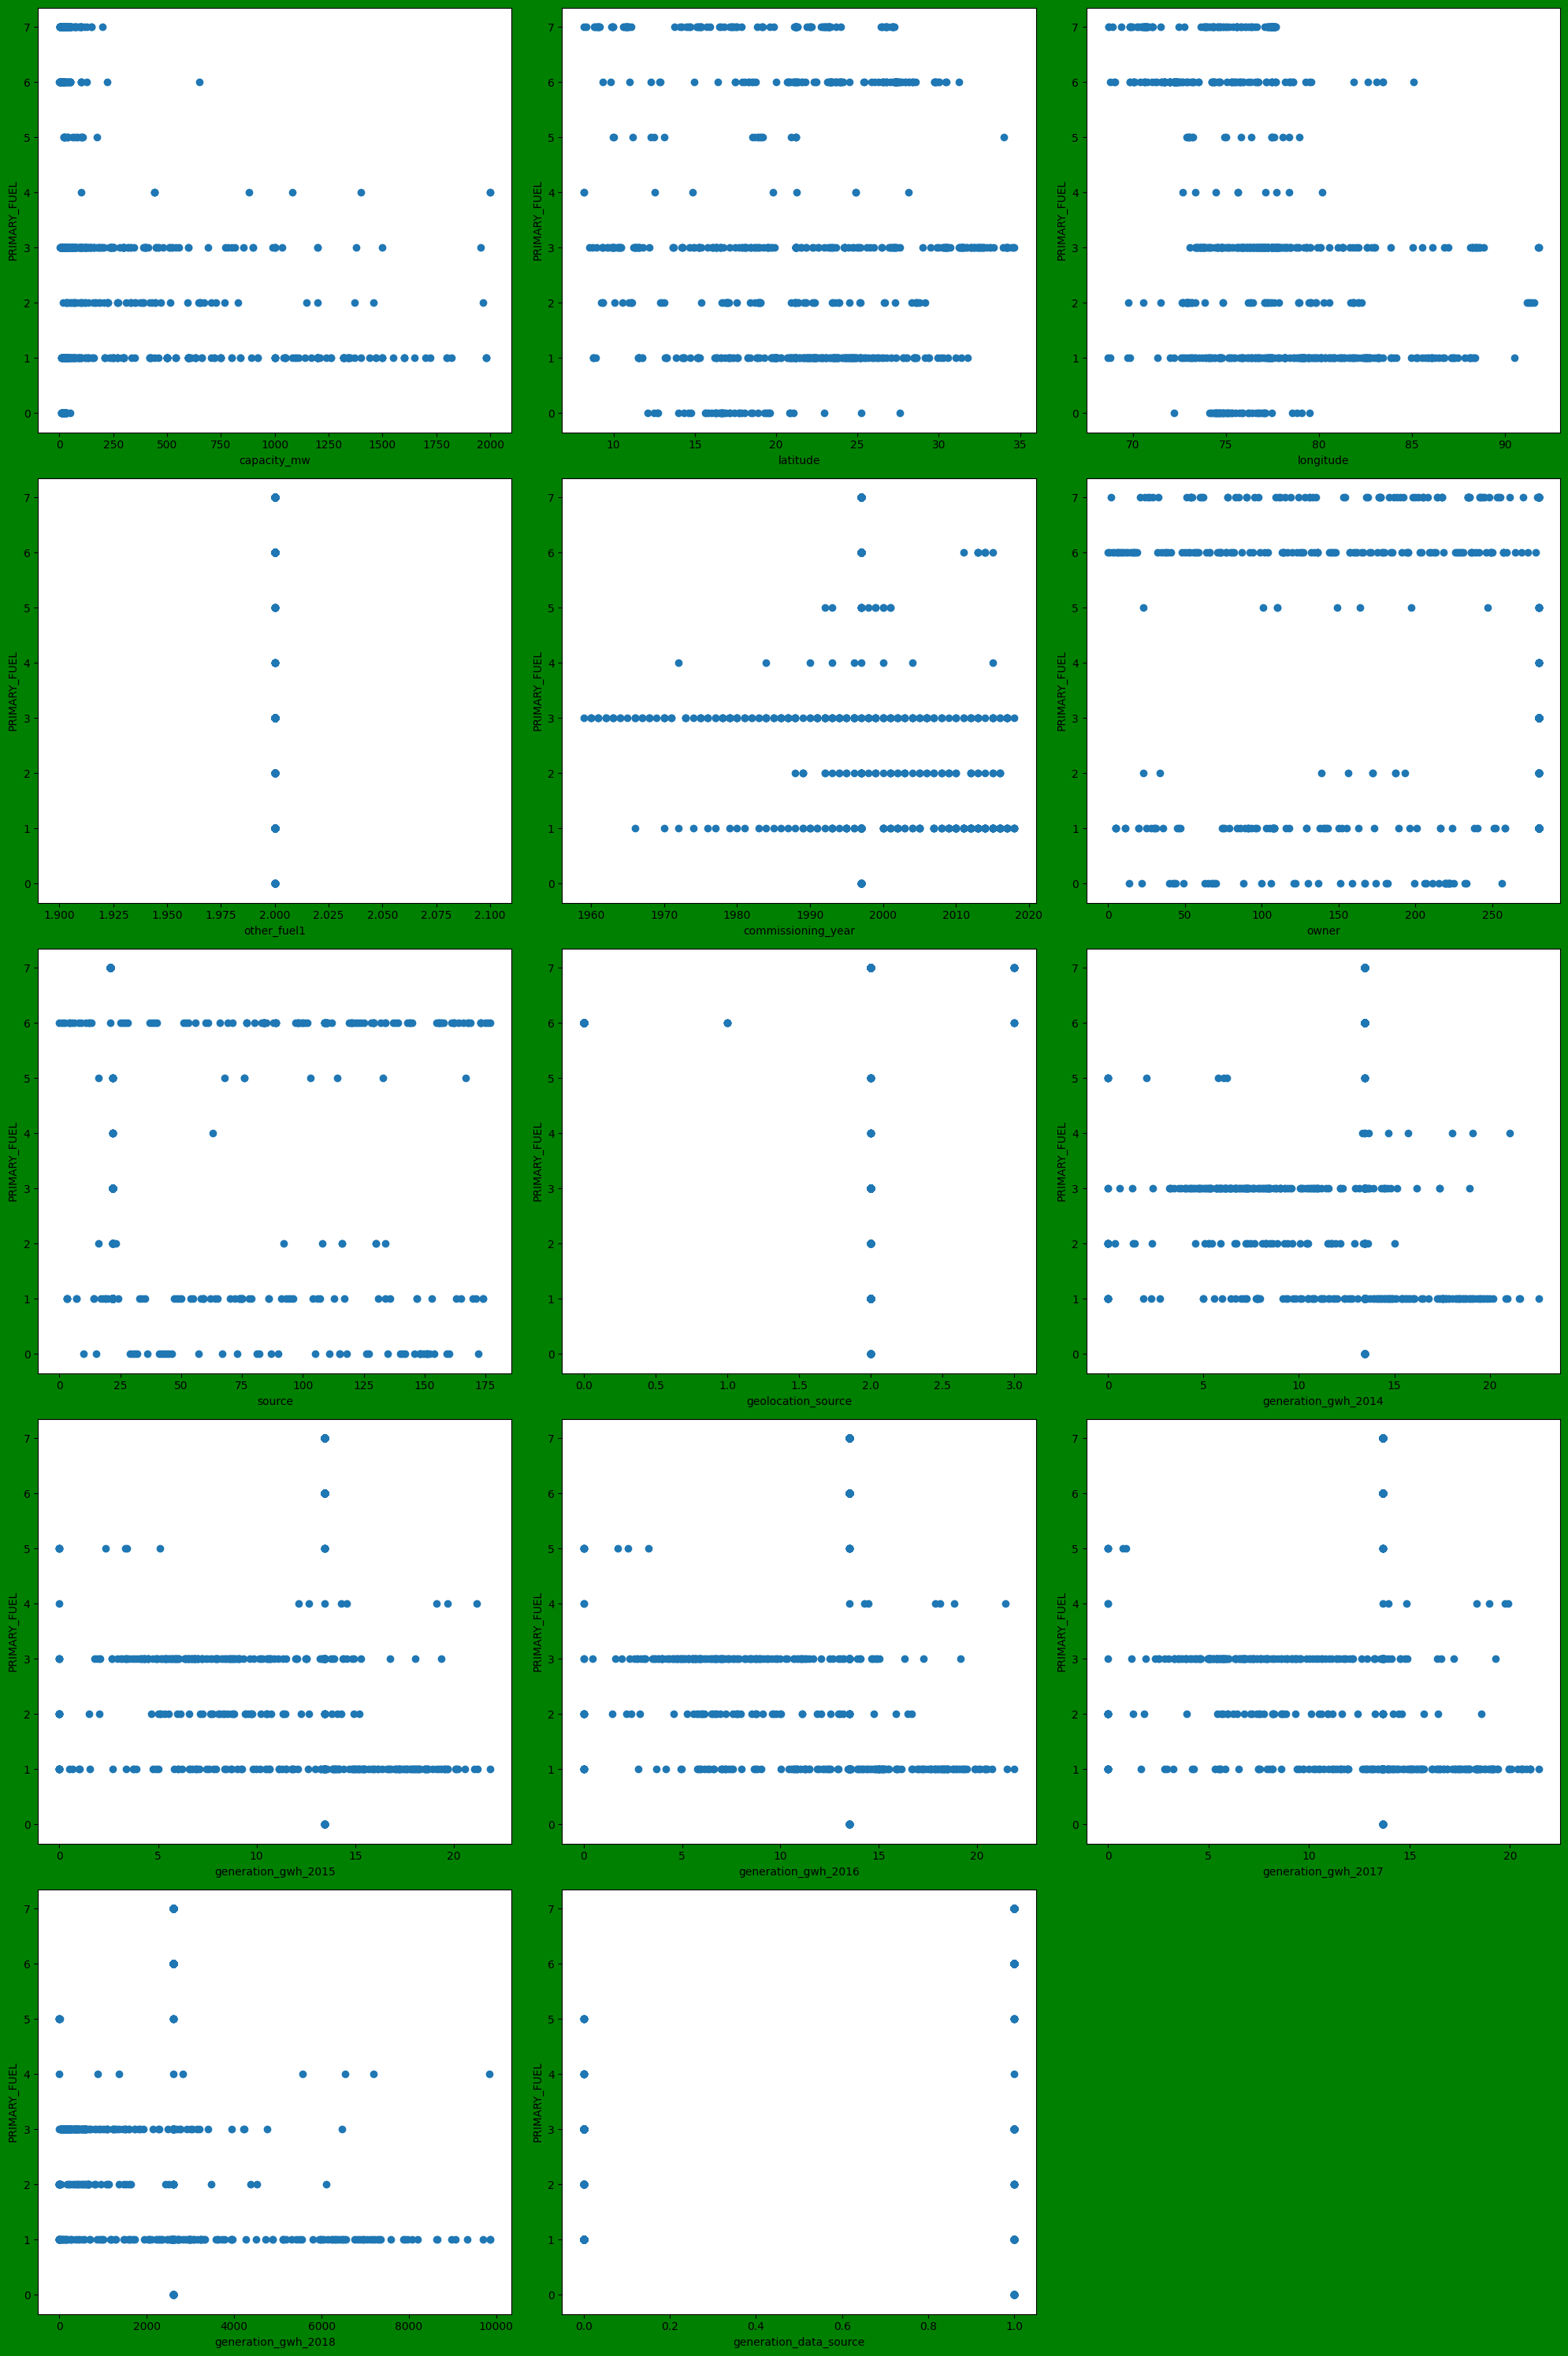

In [66]:
plt.figure(figsize=(20,30), facecolor= 'green')
plotnumber=1
for column in x:
    if plotnumber <=14:
        plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('PRIMARY_FUEL')
        plotnumber+=1
plt.tight_layout()

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i)for i in range(x.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,4.446728,capacity_mw
1,1.111020,latitude
2,1.304871,longitude
3,36214.944539,other_fuel1
4,1.152393,commissioning_year
5,1.855774,owner
6,1.607270,source
7,1.581729,geolocation_source
8,3.585113,generation_gwh_2014
9,6.609216,generation_gwh_2015


In [68]:
x=x.drop(columns='other_fuel1')

In [69]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [70]:
from imblearn.over_sampling import SMOTE
print('sample distribution before SMOTE:',y.value_counts())
sm=SMOTE()

sample distribution before SMOTE: 1.0    231
3.0    221
7.0    123
6.0    121
2.0     64
0.0     45
5.0     18
4.0      9
Name: primary_fuel, dtype: int64


In [71]:
x1,y1=sm.fit_resample(x_scaled,y)
print('**************************************************')
print('sample distribution after SMOTE:',y1.value_counts())

**************************************************
sample distribution after SMOTE: 6.0    231
1.0    231
7.0    231
2.0    231
3.0    231
0.0    231
5.0    231
4.0    231
Name: primary_fuel, dtype: int64


In [72]:
max_accuracy=0
max_rs=0
for i in range (300):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=i)
    RF=RandomForestClassifier()
    RF.fit(x_train,y_train)
    pred=RF.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > max_accuracy:
        max_accuracy=acc
        max_rs=i
print('Maximum accuracy:',max_accuracy, 'on random state:',max_rs)

Maximum accuracy: 0.954954954954955 on random state: 49


In [106]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=max_rs)

In [74]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
P_DTC=DTC.predict(x_test)
P_DTC_T=DTC.predict(x_train)
score_DTC=cross_val_score(DTC,x_test,y_test)
acc_dtc=accuracy_score(y_test,P_DTC)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_DTC))
print('cross_val_score=',score_DTC)
print('--------------------------------------------------------------------------------------')
cv_mean_dtc=score_DTC.mean()
print('--------------------------------------------------------------------------------------')
diff_dtc_score=accuracy_score(y_test,P_DTC)-score_DTC.mean()
print('difference between accuracy and cv_score is::',diff_dtc_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94        70
         1.0       0.67      0.79      0.72        66
         2.0       0.78      0.81      0.79        73
         3.0       0.80      0.81      0.81        70
         4.0       0.95      0.93      0.94        67
         5.0       0.93      0.82      0.87        76
         6.0       1.00      0.98      0.99        63
         7.0       1.00      1.00      1.00        70

    accuracy                           0.88       555
   macro avg       0.89      0.88      0.88       555
weighted avg       0.89      0.88      0.88       555

cross_val_score= [0.87297297 0.9027027  0.89189189 0.89159892 0.91327913]
--------------------------------------------------------------------------------------
------------------------------------------

In [75]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
P_ETC=ETC.predict(x_test)
P_ETC_T=ETC.predict(x_train)
score_ETC=cross_val_score(ETC,x_test,y_test)
acc_ETC=accuracy_score(y_test,P_ETC)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_ETC))
print('cross_val_score=',score_ETC)
print('--------------------------------------------------------------------------------------')
cv_mean_etc=score_ETC.mean()
print('--------------------------------------------------------------------------------------')
diff_etc_score=accuracy_score(y_test,P_ETC)-score_ETC.mean()
print('difference between accuracy and cv_score is::',diff_etc_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        70
         1.0       0.92      0.86      0.89        66
         2.0       0.90      0.97      0.93        73
         3.0       0.97      0.93      0.95        70
         4.0       0.99      1.00      0.99        67
         5.0       0.99      0.93      0.96        76
         6.0       1.00      1.00      1.00        63
         7.0       1.00      1.00      1.00        70

    accuracy                           0.96       555
   macro avg       0.96      0.96      0.96       555
weighted avg       0.96      0.96      0.96       555

cross_val_score= [0.93783784 0.93513514 0.95675676 0.93495935 0.94308943]
--------------------------------------------------------------------------------------
------------------------------------------

In [76]:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
P_GB=GB.predict(x_test)
P_GB_T=GB.predict(x_train)
score_GB=cross_val_score(GB,x_test,y_test)
acc_GB=accuracy_score(y_test,P_GB)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_GB))
print('cross_val_score=',score_GB)
print('--------------------------------------------------------------------------------------')
cv_mean_GB=score_GB.mean()
print('--------------------------------------------------------------------------------------')
diff_GB_score=accuracy_score(y_test,P_GB)-score_GB.mean()
print('difference between accuracy and cv_score is::',diff_GB_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96        70
         1.0       0.80      0.89      0.84        66
         2.0       0.85      0.88      0.86        73
         3.0       0.94      0.87      0.90        70
         4.0       0.93      0.93      0.93        67
         5.0       0.95      0.91      0.93        76
         6.0       1.00      0.98      0.99        63
         7.0       1.00      1.00      1.00        70

    accuracy                           0.93       555
   macro avg       0.93      0.93      0.93       555
weighted avg       0.93      0.93      0.93       555

cross_val_score= [0.90810811 0.91891892 0.91891892 0.91598916 0.93224932]
--------------------------------------------------------------------------------------
------------------------------------------

In [77]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)
P_RF=RF.predict(x_test)
P_RF_T=RF.predict(x_train)
score_RF=cross_val_score(RF,x_test,y_test)
acc_RF=accuracy_score(y_test,P_RF)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_RF))
print('cross_val_score=',score_RF)
print('--------------------------------------------------------------------------------------')
cv_mean_RF=score_RF.mean()
print('--------------------------------------------------------------------------------------')
diff_RF_score=accuracy_score(y_test,P_RF)-score_RF.mean()
print('difference between accuracy and cv_score is::',diff_RF_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        70
         1.0       0.91      0.89      0.90        66
         2.0       0.91      0.93      0.92        73
         3.0       0.97      0.91      0.94        70
         4.0       0.94      1.00      0.97        67
         5.0       0.96      0.92      0.94        76
         6.0       1.00      1.00      1.00        63
         7.0       1.00      1.00      1.00        70

    accuracy                           0.96       555
   macro avg       0.96      0.96      0.96       555
weighted avg       0.96      0.96      0.96       555

cross_val_score= [0.91621622 0.91891892 0.94864865 0.92411924 0.93495935]
--------------------------------------------------------------------------------------
------------------------------------------

In [78]:
SV=SVC()
SV.fit(x_train,y_train)
P_SV=SV.predict(x_test)
P_SV_T=SV.predict(x_train)
score_SV=cross_val_score(SV,x_test,y_test)
acc_SV=accuracy_score(y_test,P_SV)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_SV))
print('cross_val_score=',score_SV)
print('--------------------------------------------------------------------------------------')
cv_mean_SV=score_SV.mean()
print('--------------------------------------------------------------------------------------')
diff_SV_score=accuracy_score(y_test,P_SV)-score_SV.mean()
print('difference between accuracy and cv_score is::',diff_SV_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.64      0.99      0.78        70
         1.0       0.88      0.58      0.70        66
         2.0       0.76      0.71      0.74        73
         3.0       0.90      0.66      0.76        70
         4.0       0.92      1.00      0.96        67
         5.0       0.76      0.75      0.75        76
         6.0       1.00      1.00      1.00        63
         7.0       0.85      0.91      0.88        70

    accuracy                           0.82       555
   macro avg       0.84      0.82      0.82       555
weighted avg       0.84      0.82      0.82       555

cross_val_score= [0.82432432 0.82432432 0.85135135 0.82113821 0.83739837]
--------------------------------------------------------------------------------------
------------------------------------------

In [79]:
KN=KNeighborsClassifier()
KN.fit(x_train,y_train)
P_KN=KN.predict(x_test)
P_KN_T=KN.predict(x_train)
score_KN=cross_val_score(KN,x_test,y_test)
acc_KN=accuracy_score(y_test,P_KN)
print('classification_report------')
print('*********************************************************************************************************************')
print(classification_report(y_test,P_KN))
print('cross_val_score=',score_KN)
print('--------------------------------------------------------------------------------------')
cv_mean_KN=score_KN.mean()
print('--------------------------------------------------------------------------------------')
diff_KN_score=accuracy_score(y_test,P_KN)-score_KN.mean()
print('difference between accuracy and cv_score is::',diff_KN_score)

classification_report------
*********************************************************************************************************************
              precision    recall  f1-score   support

         0.0       0.82      0.97      0.89        70
         1.0       0.80      0.67      0.73        66
         2.0       0.79      0.74      0.77        73
         3.0       0.94      0.71      0.81        70
         4.0       0.84      0.99      0.90        67
         5.0       0.83      0.88      0.85        76
         6.0       1.00      1.00      1.00        63
         7.0       0.90      0.94      0.92        70

    accuracy                           0.86       555
   macro avg       0.87      0.86      0.86       555
weighted avg       0.86      0.86      0.86       555

cross_val_score= [0.87837838 0.86216216 0.88918919 0.86720867 0.89701897]
--------------------------------------------------------------------------------------
------------------------------------------

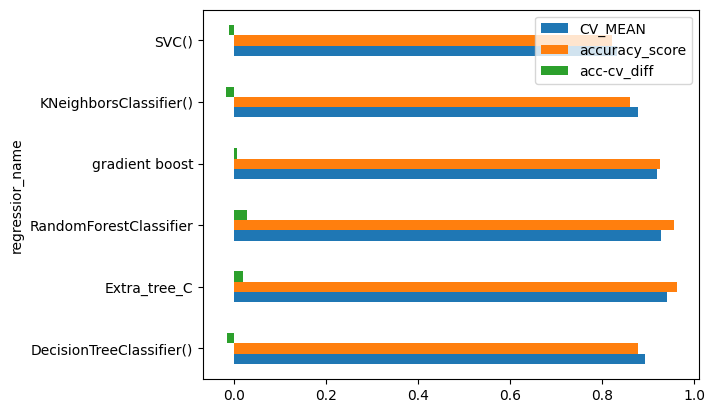

In [80]:
ml_compare=pd.DataFrame()
DT_C={'regressior_name':DTC,'CV_MEAN':cv_mean_dtc,'accuracy_score':acc_dtc,'acc-cv_diff':diff_dtc_score}
ET_C={'regressior_name':'Extra_tree_C','CV_MEAN':cv_mean_etc,'accuracy_score':acc_ETC,'acc-cv_diff':diff_etc_score}
RF_C={'regressior_name':'RandomForestClassifier','CV_MEAN':cv_mean_RF,'accuracy_score':acc_RF,'acc-cv_diff':diff_RF_score}
GB_C={'regressior_name':'gradient boost','CV_MEAN':cv_mean_GB,'accuracy_score':acc_GB,'acc-cv_diff':diff_GB_score}
KNN_C={'regressior_name':KN,'CV_MEAN':cv_mean_KN,'accuracy_score':acc_KN,'acc-cv_diff':diff_KN_score}
SV_C={'regressior_name':SV,'CV_MEAN':cv_mean_SV,'accuracy_score':acc_SV,'acc-cv_diff':diff_SV_score}
ml_compare=ml_compare.append([DT_C,ET_C,RF_C,GB_C,KNN_C,SV_C],ignore_index=True)
ml_compare=ml_compare.set_index(['regressior_name'])
ml_compare.plot.barh()
plt.show()

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
##parameter option:
p={'n_estimators':[100,200,300],'criterion':['entropy','gini','log_loss'],'min_samples_split':[2,4,6],'random_state':[200,350,900]}
GCV=GridSearchCV(ExtraTreesClassifier(),param_grid=p,cv=5)
final=GCV.fit(x_train,y_train)
print(final.best_params_)

{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 200}


In [110]:
final_model=ExtraTreesClassifier(
criterion= 'gini',n_estimators=100, 
random_state=200,min_samples_split=2)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

93.87387387387388


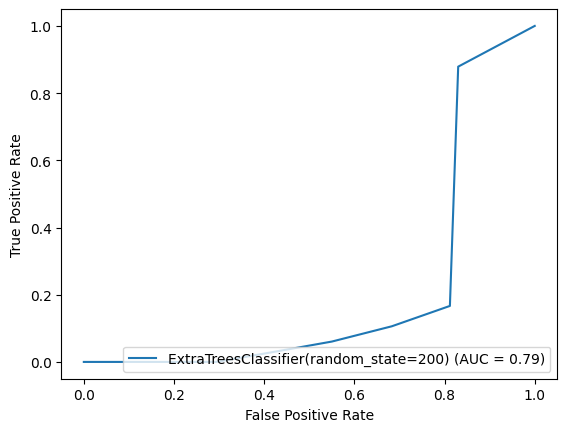

In [108]:
from sklearn import metrics
from sklearn.metrics import plot_roc_curve
fpr,tpr,thresolds=metrics.roc_curve(y_test,pred,pos_label=1)
roc_auc=metrics.auc(tpr,fpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [111]:
import pickle
file_name='Global_powerplant_primaryfuel_analysis.pkl'
pickle.dump(final_model,open(file_name,'wb'))

## REGRESSION ANALYSIS WITH 'CAPACITY_MMW'

In [112]:
x=df_z.drop(columns='capacity_mw')
y=df_z['capacity_mw']

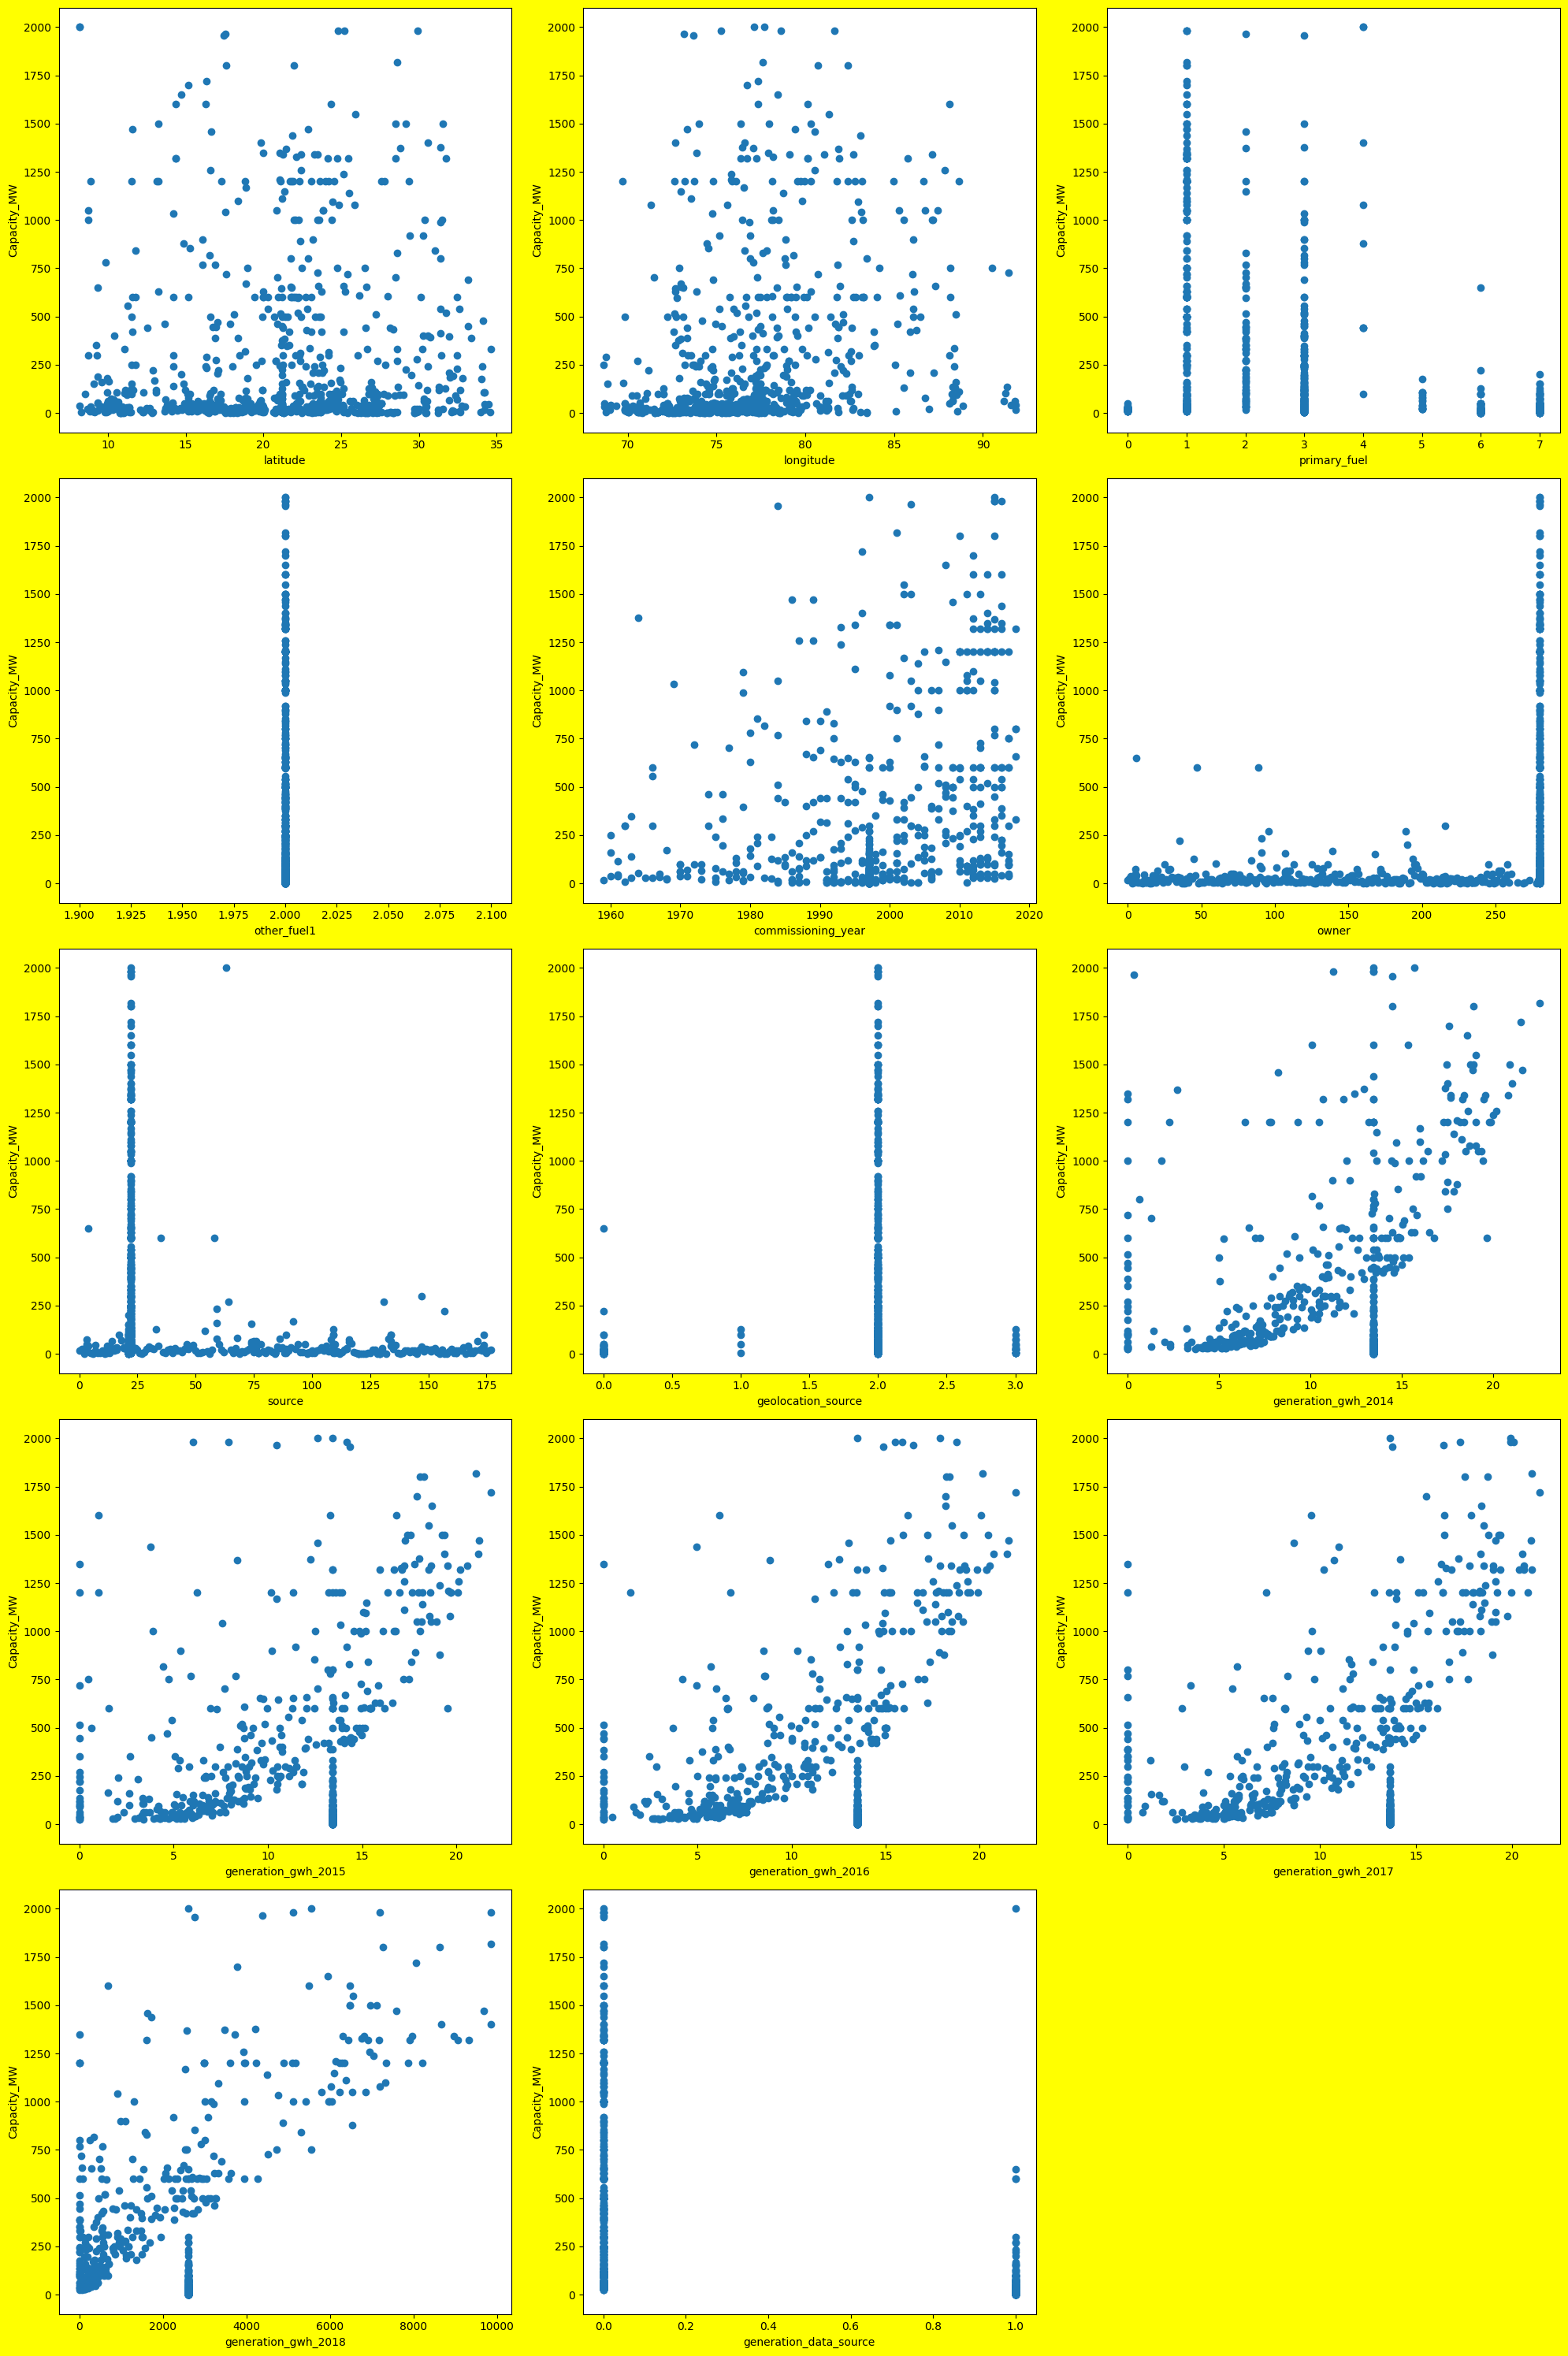

In [113]:
plt.figure(figsize=(20,30), facecolor= 'yellow')
plotnumber=1
for column in x:
    if plotnumber <=15:
        plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('Capacity_MW')
        plotnumber+=1
plt.tight_layout() 

In [114]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i)for i in range(x.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.102950,latitude
1,1.343825,longitude
2,2.010288,primary_fuel
3,35081.902775,other_fuel1
4,1.108413,commissioning_year
5,2.008876,owner
6,2.010501,source
7,2.042780,geolocation_source
8,3.570100,generation_gwh_2014
9,6.595911,generation_gwh_2015


In [115]:
x=x.drop(columns='other_fuel1')

In [116]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [117]:
max_accuracy=0
max_rs=0
for i in range (1000):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    LR=LinearRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc > max_accuracy:
        max_accuracy=acc
        max_rs=i

print('Maximum accuracy:',max_accuracy, 'on random state:',max_rs)

Maximum accuracy: 0.8629139366796419 on random state: 740


In [118]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=max_rs)

In [119]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_LR_train=LR.predict(x_train)
r2t_LR=r2_score(y_test,pred_LR)
r2tr_LR=r2_score(y_train,pred_LR_train)
mab_error_LR=mean_absolute_error(y_test,pred_LR)
msq_error_LR=mean_squared_error(y_test,pred_LR)
root_error_LR=np.sqrt(mean_squared_error(y_test,pred_LR))
cv_score_LR=cross_val_score(LR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_LR)
print('avg:',cv_score_LR.mean())
r2_cv_LR=r2_score(y_test,pred_LR)-cv_score_LR.mean()

cv_score [0.73781737 0.81951585 0.67778269 0.80268299 0.77313019]
avg: 0.7621858185407634


In [120]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
pred_DTR_train=DTR.predict(x_train)
r2t_DTR=r2_score(y_test,pred_DTR)
r2tr_DTR=r2_score(y_train,pred_DTR_train)
mab_error_DTR=mean_absolute_error(y_test,pred_DTR)
msq_error_DTR=mean_squared_error(y_test,pred_DTR)
root_error_DTR=np.sqrt(mean_squared_error(y_test,pred_DTR))
cv_score_DTR=cross_val_score(DTR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_DTR)
print('avg:',cv_score_DTR.mean())
r2_cv_DTR=r2_score(y_test,pred_DTR)-cv_score_DTR.mean()

cv_score [0.55748733 0.58855736 0.57834379 0.57208322 0.62897913]
avg: 0.5850901643364008


In [121]:
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred_ETR=ETR.predict(x_test)
pred_ETR_train=ETR.predict(x_train)
r2t_ETR=r2_score(y_test,pred_ETR)
r2tr_ETR=r2_score(y_train,pred_ETR_train)
mab_error_ETR=mean_absolute_error(y_test,pred_ETR)
msq_error_ETR=mean_squared_error(y_test,pred_ETR)
root_error_ETR=np.sqrt(mean_squared_error(y_test,pred_ETR))
cv_score_ETR=cross_val_score(ETR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_ETR)
print('avg:',cv_score_ETR.mean())
r2_cv_ETR=r2_score(y_test,pred_ETR)-cv_score_ETR.mean()

cv_score [0.84795081 0.82953608 0.69126245 0.81481258 0.74395104]
avg: 0.7855025924121735


In [122]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_GBR_train=GBR.predict(x_train)
r2t_GBR=r2_score(y_test,pred_GBR)
r2tr_GBR=r2_score(y_train,pred_GBR_train)
mab_error_GBR=mean_absolute_error(y_test,pred_GBR)
msq_error_GBR=mean_squared_error(y_test,pred_GBR)
root_error_GBR=np.sqrt(mean_squared_error(y_test,pred_GBR))
cv_score_GBR=cross_val_score(GBR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_GBR)
print('avg:',cv_score_GBR.mean())
r2_cv_GBR=r2_score(y_test,pred_GBR)-cv_score_GBR.mean()

cv_score [0.76088477 0.8367484  0.68246951 0.70471202 0.75815102]
avg: 0.748593142807409


In [123]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
pred_KNR=KNR.predict(x_test)
pred_KNR_train=KNR.predict(x_train)
r2t_KNR=r2_score(y_test,pred_KNR)
r2tr_KNR=r2_score(y_train,pred_KNR_train)
mab_error_KNR=mean_absolute_error(y_test,pred_KNR)
msq_error_KNR=mean_squared_error(y_test,pred_KNR)
root_error_KNR=np.sqrt(mean_squared_error(y_test,pred_KNR))
cv_score_KNR=cross_val_score(KNR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_KNR)
print('avg:',cv_score_KNR.mean())
r2_cv_KNR=r2_score(y_test,pred_KNR)-cv_score_KNR.mean()

cv_score [0.81708642 0.76388683 0.65514532 0.77255859 0.72902378]
avg: 0.7475401866143874


In [124]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_RFR_train=RFR.predict(x_train)
r2t_RFR=r2_score(y_test,pred_RFR)
r2tr_RFR=r2_score(y_train,pred_RFR_train)
mab_error_RFR=mean_absolute_error(y_test,pred_RFR)
msq_error_RFR=mean_squared_error(y_test,pred_RFR)
root_error_RFR=np.sqrt(mean_squared_error(y_test,pred_RFR))
cv_score_RFR=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_RFR)
print('avg:',cv_score_RFR.mean())
r2_cv_RFR=r2_score(y_test,pred_RFR)-cv_score_RFR.mean()

cv_score [0.79170304 0.84138035 0.69058862 0.78100187 0.77619133]
avg: 0.7761730412485814


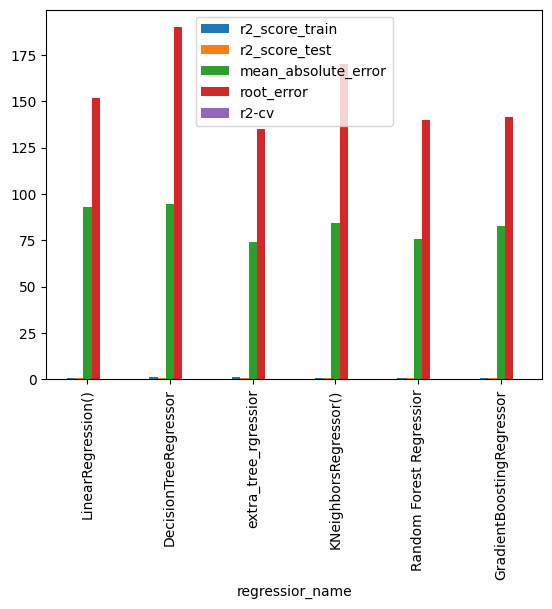

In [125]:
ml_compare=pd.DataFrame()
data1={'regressior_name':LR,'r2_score_train':r2tr_LR,'r2_score_test':r2t_LR,'mean_absolute_error':mab_error_LR,'root_error':root_error_LR,'r2-cv':r2_cv_LR}
data2={'regressior_name':'DecisionTreeRegressor','r2_score_train':r2tr_DTR,'r2_score_test':r2t_DTR,'mean_absolute_error':mab_error_DTR,'root_error':root_error_DTR,'r2-cv':r2_cv_DTR}
data3={'regressior_name':'extra_tree_rgressior','r2_score_train':r2tr_ETR,'r2_score_test':r2t_ETR,'mean_absolute_error':mab_error_ETR,'root_error':root_error_ETR,'r2-cv':r2_cv_ETR}
data4={'regressior_name':KNR,'r2_score_train':r2tr_KNR,'r2_score_test':r2t_KNR,'mean_absolute_error':mab_error_KNR,'root_error':root_error_KNR,'r2-cv':r2_cv_KNR}
data5={'regressior_name':'Random Forest Regressior','r2_score_train':r2tr_RFR,'r2_score_test':r2t_RFR,'mean_absolute_error':mab_error_RFR,'root_error':root_error_RFR,'r2-cv':r2_cv_RFR}
data6={'regressior_name':'GradientBoostingRegressor','r2_score_train':r2tr_GBR,'r2_score_test':r2t_GBR,'mean_absolute_error':mab_error_GBR,'root_error':root_error_GBR,'r2-cv':r2_cv_GBR}
ml_compare=ml_compare.append([data1,data2,data3,data4,data5,data6],ignore_index=True)
ml_compare=ml_compare.set_index(['regressior_name'])
ml_compare.plot.bar()
plt.show()

In [127]:
p={'n_estimators':[100],'criterion':['absolute_error','friedman_mse','poisson','squared_error'],'random_state':[100,200]}
gcv_r=GridSearchCV(RandomForestRegressor(),param_grid=p,cv=5)
final=gcv_r.fit(x_train,y_train)
print(final.best_params_)


{'criterion': 'absolute_error', 'n_estimators': 100, 'random_state': 100}


In [130]:
finalmodel=RandomForestRegressor(n_estimators=100,criterion='absolute_error',min_samples_split=2,random_state=100)
finalmodel.fit(x_train,y_train)
pred_final=finalmodel.predict(x_test)
r2_s=r2_score(y_test,pred_final)
print(r2_s)

0.886673271489208


In [131]:
import pickle
file_name='Global_powerplant_capacity_analysis.pkl'
pickle.dump(final_model,open(file_name,'wb'))